In [726]:
#importing the libraries
import collections
import nltk
import pandas as pd 
import numpy as np
import plotly.express as px
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
stopwords = set(STOPWORDS) 
stopwords.add("app")
stopwords.add("")
stopwords.add("pay")
stopwords.add("google")
stopwords.add("card")
stopwords.add("still"),
stopwords.add("why")
stopwords.add("dtype")
stopwords.add("Content_")
stopwords.add("boarding")
stopwords.add("see")
stopwords.add("Length")
stopwords.add("Name")
stopwords.add("passes")
stopwords.add("tab")
stopwords.add("object")
stopwords.add("add")
stopwords.add("phone")
stopwords.add("dont")
stopwords.add("time")
stopwords.add("cant")
stopwords.add("cards")
stopwords.add("money")
stopwords.add("now")
stopwords.add("doesnt")
stopwords.add("op")
stopwords.add("paytm")
stopwords.add("redeem")

In [727]:
#Load the dataset
Gpay= pd.read_csv("/Users/meghabatra/Downloads/archive-6/GooglePayIndia.csv") #Googlepay
Paytm = pd.read_csv("/Users/meghabatra/Downloads/archive-6/PaytmIndia.csv")  #Paytm
Phonepay = pd.read_csv("/Users/meghabatra/Downloads/archive-6/PhonePayIndia.csv") #Phonepay

In [728]:
#Display shape of the dataset
Gpay.shape

(34228, 11)

In [729]:
#Display shape of the dataset
Paytm.shape

(137907, 11)

In [730]:
#Display shape of the dataset
Phonepay.shape

(11741, 11)

In [731]:
#Concise summary of the dataset
Gpay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34228 entries, 0 to 34227
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            34228 non-null  int64 
 1   reviewId              34228 non-null  object
 2   userName              34227 non-null  object
 3   userImage             34228 non-null  object
 4   content               34223 non-null  object
 5   score                 34228 non-null  int64 
 6   thumbsUpCount         34228 non-null  int64 
 7   reviewCreatedVersion  29987 non-null  object
 8   at                    34228 non-null  object
 9   replyContent          6112 non-null   object
 10  repliedAt             6112 non-null   object
dtypes: int64(3), object(8)
memory usage: 2.9+ MB


In [732]:
#Concise summary of the dataset
Paytm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137907 entries, 0 to 137906
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Unnamed: 0            137907 non-null  int64 
 1   reviewId              137907 non-null  object
 2   userName              137907 non-null  object
 3   userImage             137907 non-null  object
 4   content               137905 non-null  object
 5   score                 137907 non-null  int64 
 6   thumbsUpCount         137907 non-null  int64 
 7   reviewCreatedVersion  114242 non-null  object
 8   at                    137907 non-null  object
 9   replyContent          68127 non-null   object
 10  repliedAt             68127 non-null   object
dtypes: int64(3), object(8)
memory usage: 11.6+ MB


In [733]:
#Concise summary of the dataset
Phonepay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11741 entries, 0 to 11740
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            11741 non-null  int64 
 1   reviewId              11741 non-null  object
 2   userName              11741 non-null  object
 3   userImage             11741 non-null  object
 4   content               11741 non-null  object
 5   score                 11741 non-null  int64 
 6   thumbsUpCount         11741 non-null  int64 
 7   reviewCreatedVersion  9605 non-null   object
 8   at                    11741 non-null  object
 9   replyContent          2936 non-null   object
 10  repliedAt             2936 non-null   object
dtypes: int64(3), object(8)
memory usage: 1009.1+ KB


In [734]:
#check for null values
Gpay.isnull().sum()

Unnamed: 0                  0
reviewId                    0
userName                    1
userImage                   0
content                     5
score                       0
thumbsUpCount               0
reviewCreatedVersion     4241
at                          0
replyContent            28116
repliedAt               28116
dtype: int64

In [735]:
#check for null values
Paytm.isnull().sum()

Unnamed: 0                  0
reviewId                    0
userName                    0
userImage                   0
content                     2
score                       0
thumbsUpCount               0
reviewCreatedVersion    23665
at                          0
replyContent            69780
repliedAt               69780
dtype: int64

In [736]:
#check for null values
Phonepay.isnull().sum()

Unnamed: 0                 0
reviewId                   0
userName                   0
userImage                  0
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion    2136
at                         0
replyContent            8805
repliedAt               8805
dtype: int64

In [737]:
##General descriptive Statistics
Gpay.describe(include = 'all')

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
count,34228.000000,34228,34227,34228,34223,34228.000000,34228.000000,29987,34228,6112,6112
unique,NaN,34228,33182,34006,27725,NaN,NaN,128,34219,5010,6112
top,NaN,gp:AOqpTOGmniOpyvA1gFm7sh1x_LOU4e7yfRXdvqmp7PP...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Good,NaN,NaN,2.111.306893647,2019-10-30 22:04:05,Hi there. Let's connect you to a specialist fo...,2020-09-28 20:31:36
freq,NaN,1,224,223,681,NaN,NaN,3674,2,101,1
mean,17113.500000,NaN,NaN,NaN,NaN,3.651689,3.537718,NaN,NaN,NaN,NaN
std,9880.916843,NaN,NaN,NaN,NaN,1.715733,29.213717,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN
25%,8556.750000,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN
50%,17113.500000,NaN,NaN,NaN,NaN,5.000000,0.000000,NaN,NaN,NaN,NaN
75%,25670.250000,NaN,NaN,NaN,NaN,5.000000,1.000000,NaN,NaN,NaN,NaN


There are total 34228 unique reviewIds and 34227 unique userNames

In [738]:
##General descriptive Statistics
Paytm.describe(include = 'all')

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
count,137907.000000,137907,137907,137907,137905,137907.000000,137907.000000,114242,137907,68127,68127
unique,NaN,137907,120417,137470,60655,NaN,NaN,201,136596,6316,67759
top,NaN,gp:AOqpTOGU6izZ3GFzLu0PejDWxXHIFq4zORIKh368Dpp...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Good,NaN,NaN,9.12.2,2021-08-27 17:19:39,Awesome! It's been our pleasure. You can also ...,2021-09-24 18:00:33
freq,NaN,1,438,438,12691,NaN,NaN,32327,3,19205,3
mean,68953.000000,NaN,NaN,NaN,NaN,4.270342,0.351135,NaN,NaN,NaN,NaN
std,39810.466124,NaN,NaN,NaN,NaN,1.378509,10.068025,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN
25%,34476.500000,NaN,NaN,NaN,NaN,4.000000,0.000000,NaN,NaN,NaN,NaN
50%,68953.000000,NaN,NaN,NaN,NaN,5.000000,0.000000,NaN,NaN,NaN,NaN
75%,103429.500000,NaN,NaN,NaN,NaN,5.000000,0.000000,NaN,NaN,NaN,NaN


There are total 137907 unique reviewid and 120417 unique userNames

In [739]:
##General descriptive Statistics
Phonepay.describe(include = 'all')

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
count,11741.00000,11741,11741,11741,11741,11741.000000,11741.000000,9605,11741,2936,2936
unique,NaN,11741,11353,11704,5813,NaN,NaN,83,11607,2139,2936
top,NaN,gp:AOqpTOFo_scBoiaP69nPIwuLFRbLYk9sdXN0ja4xFHI...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Good,NaN,NaN,4.1.25,2021-11-10 21:00:25,Thank you for the feedback. We work hard to me...,2021-11-10 20:36:12
freq,NaN,1,38,38,1750,NaN,NaN,6778,3,87,1
mean,5870.00000,NaN,NaN,NaN,NaN,4.113534,0.208074,NaN,NaN,NaN,NaN
std,3389.47909,NaN,NaN,NaN,NaN,1.460953,5.665902,NaN,NaN,NaN,NaN
min,0.00000,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN
25%,2935.00000,NaN,NaN,NaN,NaN,4.000000,0.000000,NaN,NaN,NaN,NaN
50%,5870.00000,NaN,NaN,NaN,NaN,5.000000,0.000000,NaN,NaN,NaN,NaN
75%,8805.00000,NaN,NaN,NaN,NaN,5.000000,0.000000,NaN,NaN,NaN,NaN


There are total 11741 unique reviewIds and 11353 unique userNames

In [740]:
#Display top 10 rows
Gpay.head(10)

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,0,gp:AOqpTOEdT_VactGi_J9Q2PEWY7J4XlD7BINhOj9xwOr...,Len Pagnam,https://play-lh.googleusercontent.com/a-/AOh14...,How do add a boarding pass? I see no passes tab.,1,0,2.137.401329300,2021-11-18 17:03:06,Hi Len. Could you try the steps in this guide ...,2021-11-18 17:27:11
1,1,gp:AOqpTOHltpCzXurPoFUgj-a3L-wApC93-fTvocbF9K7...,Benjamin Silva,https://play-lh.googleusercontent.com/a/AATXAJ...,Best,5,0,2.134.392709498,2021-11-18 16:43:34,NaN,NaN
2,2,gp:AOqpTOGTiyxy_FWSQe7eCONa7PsIP6v7cS-xWCL6jFF...,PARVESH MIAR,https://play-lh.googleusercontent.com/a-/AOh14...,All ok,5,0,2.138.406141160,2021-11-18 16:12:42,NaN,NaN
3,3,gp:AOqpTOHllyGnmLGZqPUGokxYncq9kOKoY3Zz_4ZF6b0...,Mikko L.,https://play-lh.googleusercontent.com/a-/AOh14...,"Rasy to use really... But there never, ever sh...",3,0,2.138.406141160,2021-11-18 16:06:35,NaN,NaN
4,4,gp:AOqpTOHjnJ6gAF4NzruhLDGVszAaTKSerVeKt-UtJfM...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I still do not understand why your restricting...,3,251,2.134.392709498,2021-11-18 15:48:08,NaN,NaN
5,5,gp:AOqpTOFvGxEPLlCAPDmaBWpBc5zoa2z6qFuYL27I6Q7...,Penny Smith,https://play-lh.googleusercontent.com/a/AATXAJ...,Keeps disappearing from home page. Very disapp...,2,0,2.138.406141160,2021-11-18 14:53:33,Hi Penny. We're sorry about that. Let's connec...,2021-11-18 15:45:05
6,6,gp:AOqpTOGgiTgmAz1MuYUDB9jKEn1_K4NgmfvctnlCMTc...,Jevgeni Litvinov,https://play-lh.googleusercontent.com/a-/AOh14...,No ticket/transport support for Europe. Also n...,4,0,2.138.406141160,2021-11-18 14:09:26,NaN,NaN
7,7,gp:AOqpTOGtGq9UD4JtPm9Sk9FFwabOopeIUlfCyXnjzRv...,Robin Cramp,https://play-lh.googleusercontent.com/a/AATXAJ...,App is now working for me as expected. Google ...,5,11,2.138.406141160,2021-11-18 14:05:44,Hi Robin. Support for Google Pay on Wear OS wa...,2018-12-11 11:45:10
8,8,gp:AOqpTOEdjQ2KHKNbHnEk25WQ6fKlbZcABSRSglLImIz...,Matthew Chandler,https://play-lh.googleusercontent.com/a-/AOh14...,Good,5,0,2.138.406141160,2021-11-18 13:38:21,NaN,NaN
9,9,gp:AOqpTOGdOyttPPsHQSqYsjgrgmzk6DlCe734dE-NTZw...,Nadia H,https://play-lh.googleusercontent.com/a/AATXAJ...,whether it works is a matter of luck. detect v...,1,0,NaN,2021-11-18 13:37:59,Hi Nadia. We're sorry to hear that. Let's conn...,2021-11-18 14:28:43


In [741]:
#Display top 10 rows
Paytm.head()

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,0,gp:AOqpTOEc6EnY3FO6tSm3wM-BBLk-WIELfZcXamX2umO...,HARSH KASHYAP,https://play-lh.googleusercontent.com/a-/AOh14...,Op,5,0,NaN,2021-11-18 18:42:29,NaN,NaN
1,1,gp:AOqpTOFD057GRoLc_eZm_mijn7p_wL9DtQoxrYnL_Gg...,manikeswar shabar,https://play-lh.googleusercontent.com/a-/AOh14...,Good,5,0,9.17.3,2021-11-18 18:41:39,NaN,NaN
2,2,gp:AOqpTOGse_Ua7yhZRYP0bvEWZ4DqJlOAJWLQC1376sQ...,Rajendra Kumar,https://play-lh.googleusercontent.com/a/AATXAJ...,My paytm wallet app is open 😊,4,0,9.17.3,2021-11-18 18:41:35,Hi Rajendra! We’d like to take a closer look a...,2021-11-18 16:14:32
3,3,gp:AOqpTOGRVqBtB88sM6cyPudXWCG1SH_6jccdyaRNkO-...,Kagga Balaji,https://play-lh.googleusercontent.com/a/AATXAJ...,Super,5,0,9.17.3,2021-11-18 18:41:33,NaN,NaN
4,4,gp:AOqpTOHFQGJvGKSgSfzzd7jtRS68lYQNfk5rs0-u2gZ...,Ajay Pandey,https://play-lh.googleusercontent.com/a/AATXAJ...,The best,5,0,9.17.3,2021-11-18 18:41:11,NaN,NaN


In [742]:
#Display top 10 rows
Phonepay.head()

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,0,gp:AOqpTOGzdJxN4w4Xt7Uj3Xv1643TSxHxgEupPopMLfe...,Akki Love,https://play-lh.googleusercontent.com/a/AATXAJ...,Nice app,5,0,4.0.18,2021-11-18 18:37:42,NaN,NaN
1,1,gp:AOqpTOGg0B7fjwyBlTD-1Sa-UxAWV7_AXNDQyLzb4cH...,datta samindar,https://play-lh.googleusercontent.com/a-/AOh14...,Sup,5,0,NaN,2021-11-18 18:37:35,NaN,NaN
2,2,gp:AOqpTOFhQbsuL9mVajhqY8hukiQzOeqx8P7FeSK2nsM...,Rahul Jadhav,https://play-lh.googleusercontent.com/a-/AOh14...,😤,1,0,4.1.23,2021-11-18 18:36:58,NaN,NaN
3,3,gp:AOqpTOHA1KGb6C90eCxXxpIWWTMsV4ia7OlXzEuGOwA...,Rao Farman Ali,https://play-lh.googleusercontent.com/a-/AOh14...,मेरे खाते से पैसे कट गए और जिसे मैने पैसे भेजे...,1,0,4.1.25,2021-11-18 18:36:22,NaN,NaN
4,4,gp:AOqpTOE9ZJT-nlC9-JeDjgnTSORq_tD-_gkrIiRRUfE...,Tapaswini Rana,https://play-lh.googleusercontent.com/a/AATXAJ...,Useful application,5,0,4.1.25,2021-11-18 18:35:39,NaN,NaN


DATA CLEANING

In [743]:
#removing special characaters
Gpay["content"]=Gpay['content'].str.replace(r'[^\x00-\x7F]+', '', regex=True)

In [744]:
#removing special characaters
Paytm['content'] = Paytm['content'].str.replace(r'[^\x00-\x7F]+', '', regex=True)

In [745]:
#removing special characaters
Phonepay["content"]=Phonepay['content'].str.replace(r'[^\x00-\x7F]+', '', regex=True)

In [746]:
#Removing Spaces before and after each word
Gpay.content = Gpay.content.str.strip()
Paytm.content = Paytm.content.str.strip()
Phonepay.content = Phonepay.content.str.strip()

In [747]:
Gpay["Content_nopuncuation"] = Gpay['content'].str.replace('[^\w\s]','') #remove punctuation
Gpay['Content_'] = Gpay['Content_nopuncuation'].str.replace('\d+', '') 
Gpay["Content_"] = Gpay["Content_"].str.lower() #convert into lower case


<ipython-input-747-c24301e838c3>:1: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-747-c24301e838c3>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



WORD TEXT ANALYSIS

In [748]:
#spliting the sentence of words
filtered_words = Gpay["Content_"].apply(lambda x: [word for word in str(x).split(" ") if word not in stopwords])

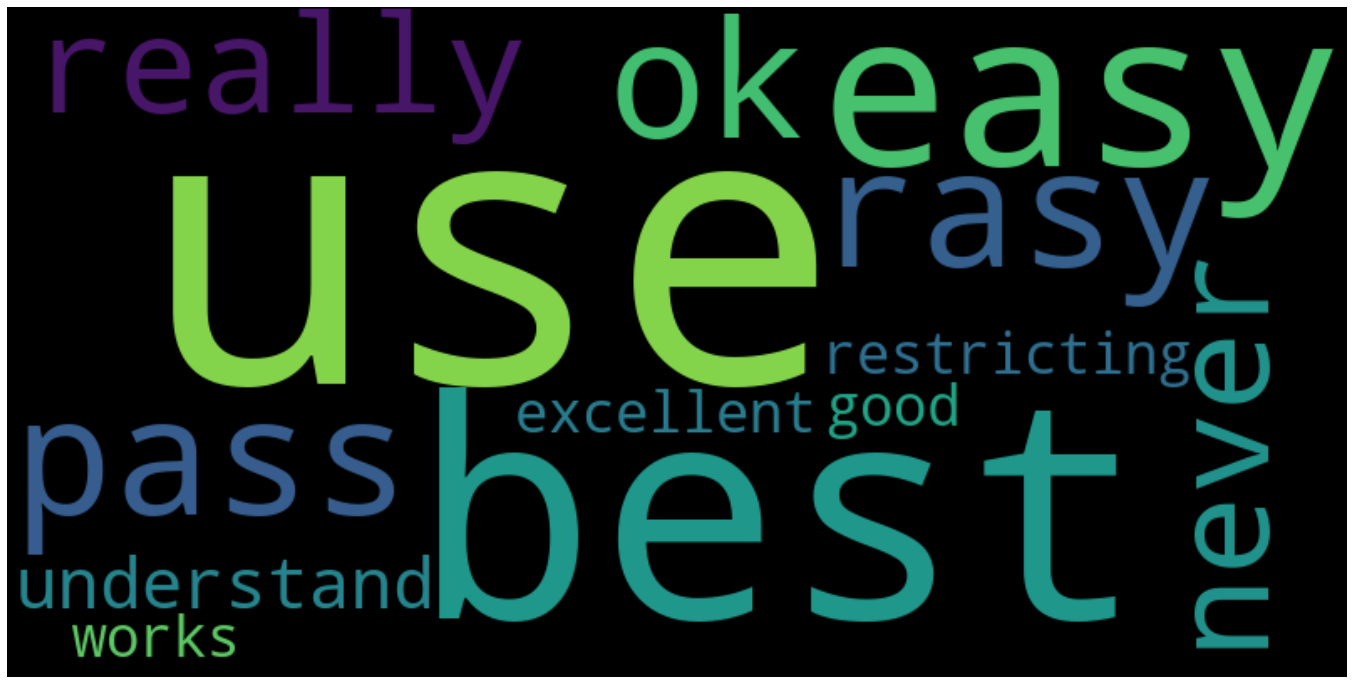

In [749]:
#WORD CLOUD
wordcloud = WordCloud(width = 800, height = 400, 
            background_color ='black',
            stopwords = stopwords,
            max_words = 1000,
            min_font_size = 1).generate(str(Gpay["Content_"]))

fig=plt.figure(figsize = (24.0,16.0))
plt.imshow(wordcloud,interpolation ="bilinear")
plt.axis("off")
plt.show()

In [750]:
wordcount = []
for i in filtered_words:
    for j in i:
        wordcount.append(j)
            
counted_words = collections.Counter(wordcount)
print(counted_words)

Counter({'use': 5719, 'easy': 3897, 'great': 3218, 'good': 3063, 'works': 2534, 'work': 2230, 'love': 2060, 'payment': 1682, 'bank': 1382, 'used': 1364, 'using': 1361, 'new': 1309, 'one': 1290, 'even': 1281, 'im': 1205, 'will': 1203, 'convenient': 1171, 'working': 1128, 'account': 1118, 'need': 1097, 'way': 1010, 'wallet': 1004, 'update': 950, 'never': 941, 'well': 908, 'really': 902, 'set': 866, 'credit': 830, 'fast': 824, 'make': 823, 'wont': 810, 'want': 799, 'samsung': 795, 'ive': 780, 'awesome': 770, 'payments': 761, 'please': 756, 'worked': 756, 'tried': 747, 'help': 715, 'far': 695, 'first': 682, 'much': 681, 'back': 676, 'quick': 670, 'apps': 669, 'excellent': 666, 'support': 652, 'every': 651, 'nfc': 651, 'times': 651, 'better': 645, 'able': 640, 'store': 640, 'says': 639, 'without': 634, 'go': 634, 'play': 630, 'debit': 616, 'know': 604, 'nice': 601, 'problem': 598, 'try': 583, 'best': 578, 'send': 574, 'contactless': 572, 'got': 558, 'security': 557, 'old': 553, 'always': 54

In [751]:
words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

counted_words.most_common(20)



[('use', 5719),
 ('easy', 3897),
 ('great', 3218),
 ('good', 3063),
 ('works', 2534),
 ('work', 2230),
 ('love', 2060),
 ('payment', 1682),
 ('bank', 1382),
 ('used', 1364),
 ('using', 1361),
 ('new', 1309),
 ('one', 1290),
 ('even', 1281),
 ('im', 1205),
 ('will', 1203),
 ('convenient', 1171),
 ('working', 1128),
 ('account', 1118),
 ('need', 1097)]

<BarContainer object of 10 artists>

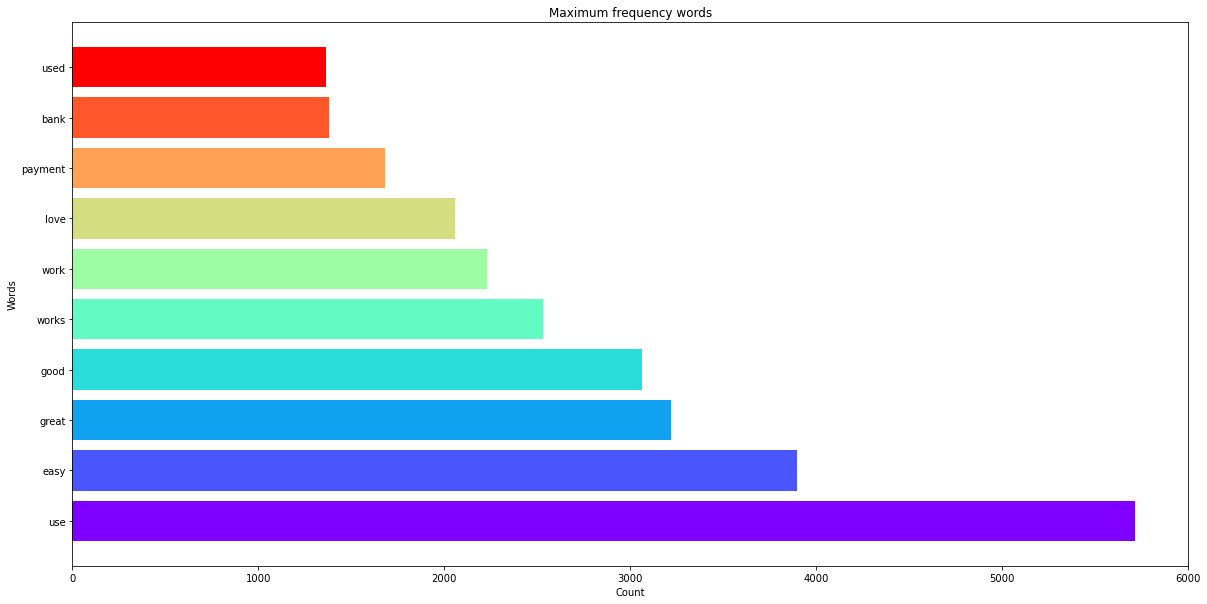

In [752]:
#Display most common 20 words
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Maximum frequency words')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

In [753]:
Paytm["Content_nopuncuation"] = Paytm['content'].str.replace('[^\w\s]','') #remove punctuation 
Paytm['Content_'] = Paytm['Content_nopuncuation'].str.replace('\d+', '')
Paytm["Content_"] = Paytm["Content_"].str.lower() #Convert into lower case


<ipython-input-753-8abc06e0205f>:1: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-753-8abc06e0205f>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



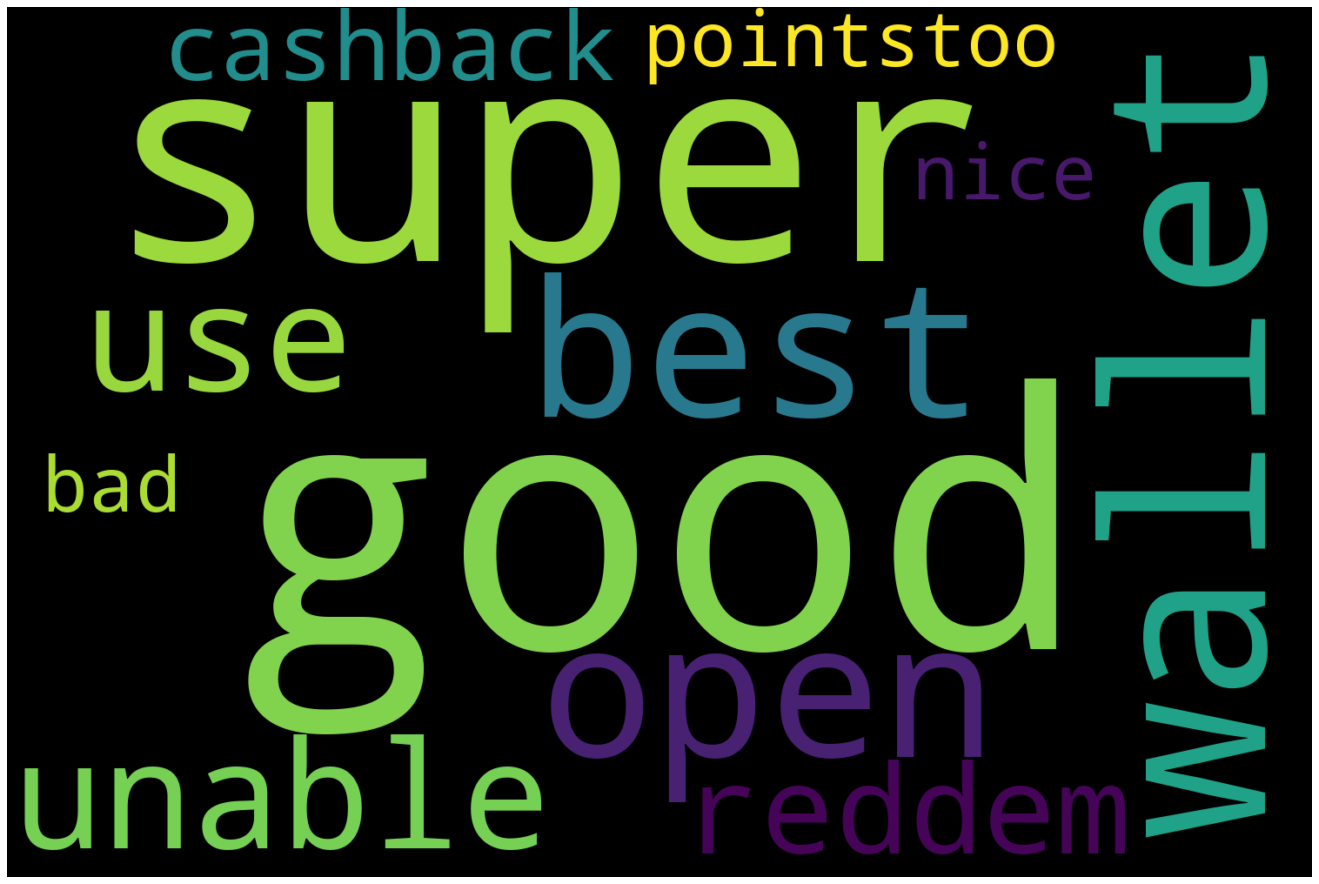

In [754]:
#WORD CLOUD
wordcloud = WordCloud(width = 1500, height = 1000, 
            background_color ='black',
            stopwords = stopwords,
            max_words = 300,
            min_font_size = 1).generate(str(Paytm["Content_"]))

fig=plt.figure(figsize = (24.0,16.0))
plt.imshow(wordcloud,interpolation = "bilinear")
plt.axis("off")
plt.show()

In [755]:
#spliting the sentence of words
filtered_words1 = Paytm["Content_"].apply(lambda x: [word for word in str(x).split(" ") if word not in stopwords])
filtered_words

0                                                   [pass]
1                                                   [best]
2                                                     [ok]
3        [rasy, use, really, never, baddata, among, app...
4        [understand, restricting, certain, legal, acti...
                               ...                        
34223                                               [good]
34224                               [excellent, easy, use]
34225                                          [easy, use]
34226                                              [works]
34227                                               [best]
Name: Content_, Length: 34228, dtype: object

In [756]:
wordcount2 = []
for i in filtered_words1:
    for j in i:
        wordcount2.append(j)
            
counted_words = collections.Counter(wordcount2)
print(counted_words)

Counter({'good': 38269, 'nice': 20022, 'best': 7027, 'super': 5941, 'payment': 5494, 'service': 5131, 'excellent': 4321, 'use': 3715, 'fast': 3446, 'easy': 3302, 'account': 2943, 'customer': 2920, 'experience': 2516, 'worst': 2484, 'bad': 2406, 'ok': 2363, 'awesome': 2325, 'great': 2245, 'please': 2207, 'bank': 2200, 'cashback': 2158, 'application': 2084, 'hai': 2078, 'aap': 1952, 'one': 1767, 'care': 1660, 'love': 1655, 'wallet': 1634, 'back': 1579, 'kyc': 1507, 'transaction': 1476, 'problem': 1466, 'useful': 1452, 'transfer': 1441, 'recharge': 1387, 'cash': 1382, 'upi': 1346, 'will': 1288, 'working': 1277, 'work': 1256, 'superb': 1252, 'apps': 1249, 'give': 1243, 'payments': 1221, 'help': 1205, 'better': 1145, 'amazing': 1079, 'option': 1064, 'support': 1034, 'using': 1028, 'number': 1022, 'thanks': 950, 'issue': 929, 'update': 909, 'h': 900, 'even': 897, 'really': 860, 'amount': 854, 'happy': 841, 'much': 841, 'days': 826, 'thank': 808, 'services': 807, 'many': 798, 'im': 775, 'rs':

In [757]:
#counted most common words
words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)
counted_words.most_common(20)

[('good', 38269),
 ('nice', 20022),
 ('best', 7027),
 ('super', 5941),
 ('payment', 5494),
 ('service', 5131),
 ('excellent', 4321),
 ('use', 3715),
 ('fast', 3446),
 ('easy', 3302),
 ('account', 2943),
 ('customer', 2920),
 ('experience', 2516),
 ('worst', 2484),
 ('bad', 2406),
 ('ok', 2363),
 ('awesome', 2325),
 ('great', 2245),
 ('please', 2207),
 ('bank', 2200)]

<BarContainer object of 10 artists>

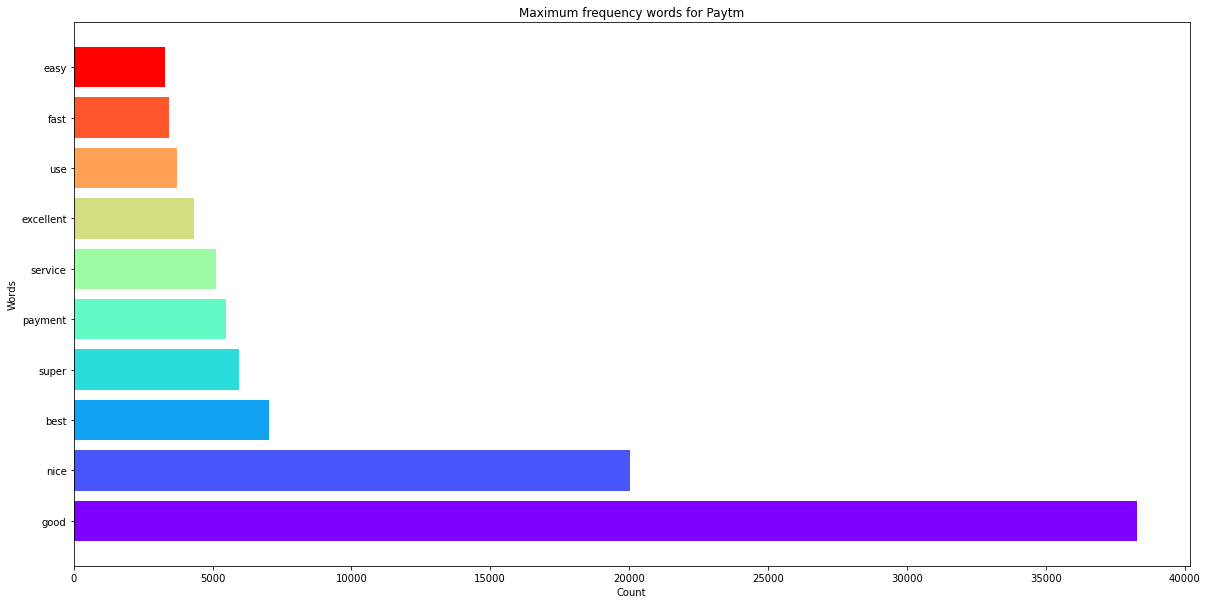

In [758]:
#Display most common 20 words
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10
plt.title('Maximum frequency words for Paytm')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

In [759]:
Phonepay["Content_nopuncuation"] = Phonepay['content'].str.replace('[^\w\s]','') #remove punctuation
Phonepay['Content_'] = Phonepay['Content_nopuncuation'].str.replace('\d+', '')
Phonepay["Content_"] = Phonepay["Content_"].str.lower() #convert the text into lower case

<ipython-input-759-cb1c572804cc>:1: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-759-cb1c572804cc>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



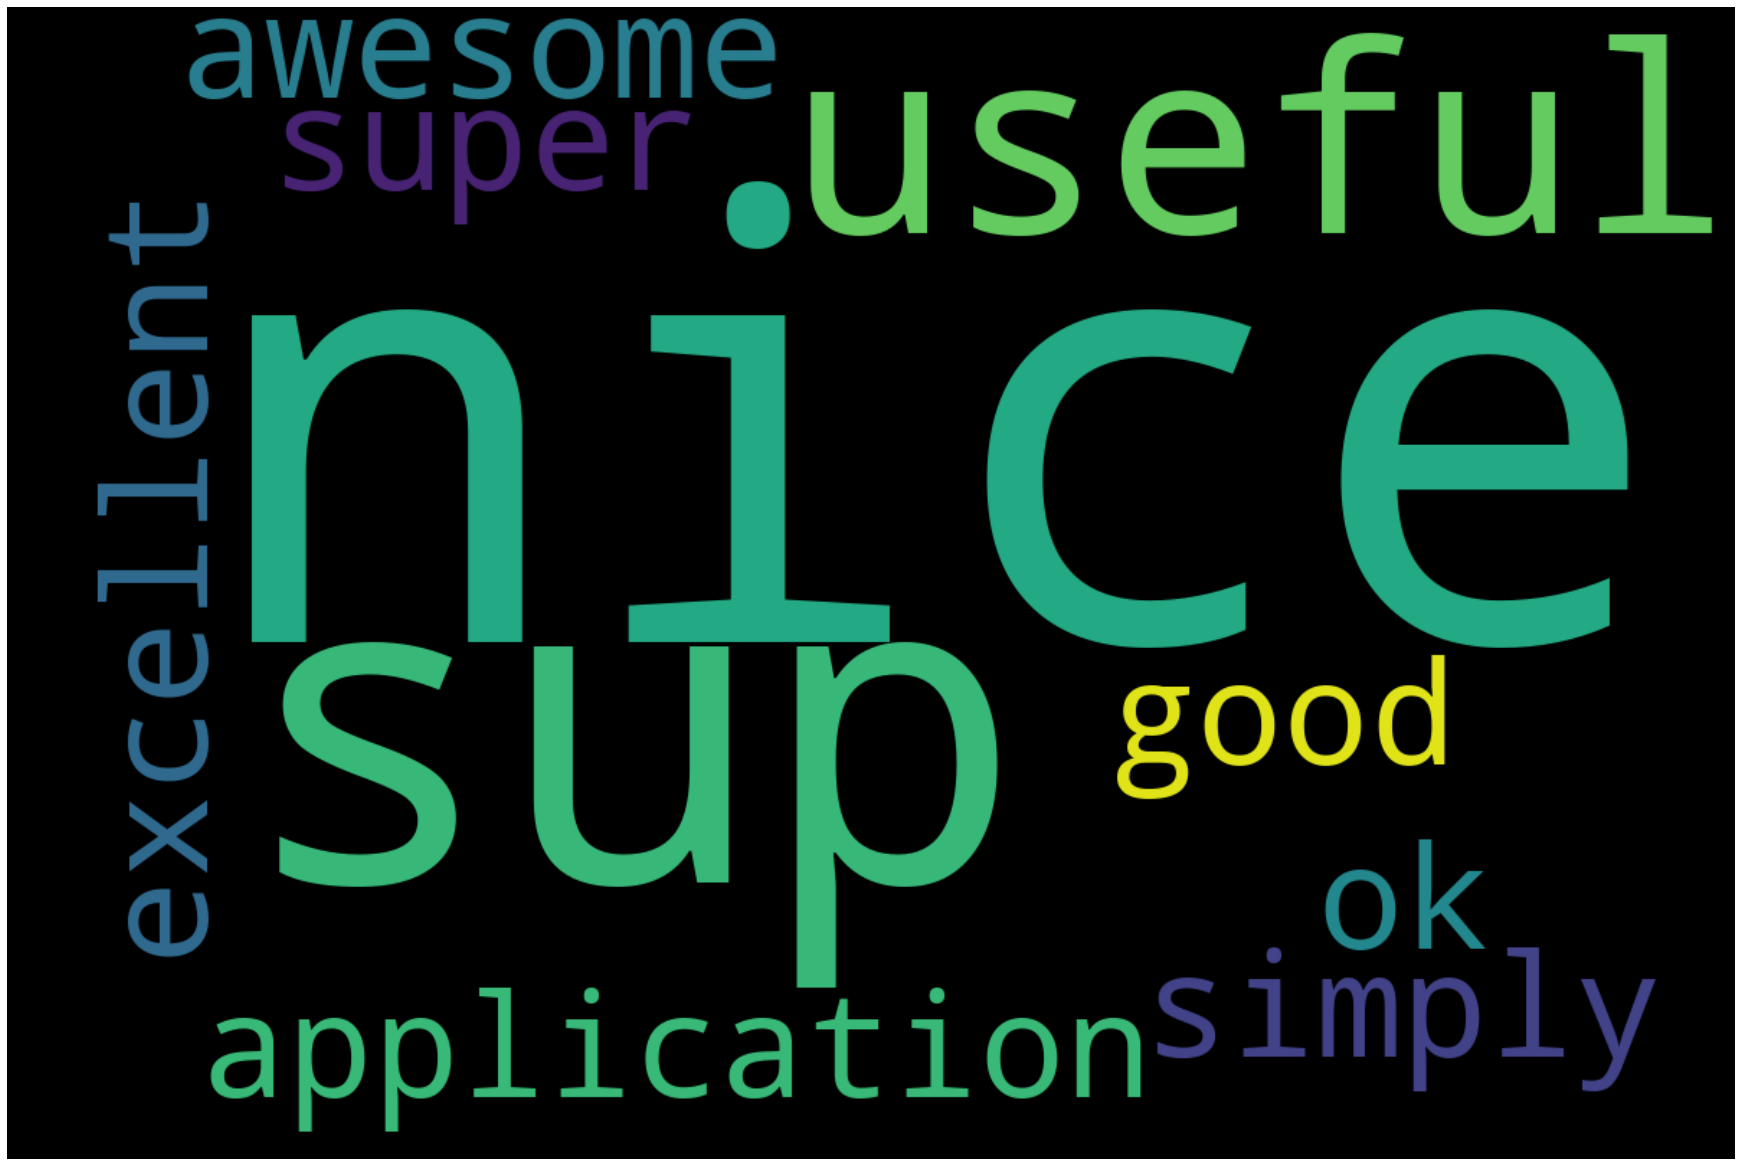

In [760]:
#WORD CLOUD
wordcloud = WordCloud(width = 1200, height = 800, 
            background_color ='black',
            stopwords = stopwords,
            max_words = 200,
            min_font_size = 10).generate(str(Phonepay["Content_"]))

fig=plt.figure(figsize = (24.0,16.0))
plt.imshow(wordcloud,interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [761]:
#spliting the sentence of words
filtered_words2 = Phonepay["Content_"].apply(lambda x: [word for word in str(x).split(" ") if word not in stopwords])
filtered_words2

0                       [nice]
1                        [sup]
2                           []
3                           []
4        [useful, application]
                 ...          
11736                   [good]
11737        [simply, awesome]
11738                  [super]
11739              [excellent]
11740                     [ok]
Name: Content_, Length: 11741, dtype: object

In [762]:
wordcount1 = []
for i in filtered_words2:
    for j in i:
        wordcount1.append(j)
            
counted_words = collections.Counter(wordcount1)
print(counted_words)

Counter({'good': 3450, 'nice': 1615, 'super': 574, 'best': 524, 'excellent': 378, 'use': 373, 'payment': 366, 'easy': 310, 'phonepe': 301, 'service': 256, 'bad': 256, 'recharge': 232, 'fast': 207, 'transaction': 204, 'ok': 197, 'account': 193, 'pe': 186, 'please': 181, 'worst': 172, 'hai': 159, 'application': 156, 'aap': 150, 'great': 149, 'experience': 144, 'useful': 142, 'transfer': 139, 'working': 139, 'love': 132, 'extra': 130, 'awesome': 130, 'bank': 125, 'one': 121, 'wallet': 121, 'apps': 117, 'will': 116, 'upi': 113, 'back': 102, 'work': 100, 'problem': 98, 'charge': 97, 'give': 96, 'mobile': 95, 'better': 93, 'amount': 89, 'superb': 89, 'cashback': 85, 'customer': 84, 'cash': 83, 'using': 81, 'rs': 80, 'option': 74, 'issue': 74, 'charging': 73, 'help': 73, 'transactions': 73, 'days': 72, 'charges': 71, 'h': 71, 'much': 71, 'hi': 70, 'every': 68, 'number': 68, 'im': 68, 'amazing': 67, 'payments': 67, 'safe': 65, 'secure': 64, 'helpful': 64, 'happy': 62, 'user': 60, 'thank': 60, 

In [763]:
#counted most common words
counted_words.most_common(10)

[('good', 3450),
 ('nice', 1615),
 ('super', 574),
 ('best', 524),
 ('excellent', 378),
 ('use', 373),
 ('payment', 366),
 ('easy', 310),
 ('phonepe', 301),
 ('service', 256)]

<BarContainer object of 10 artists>

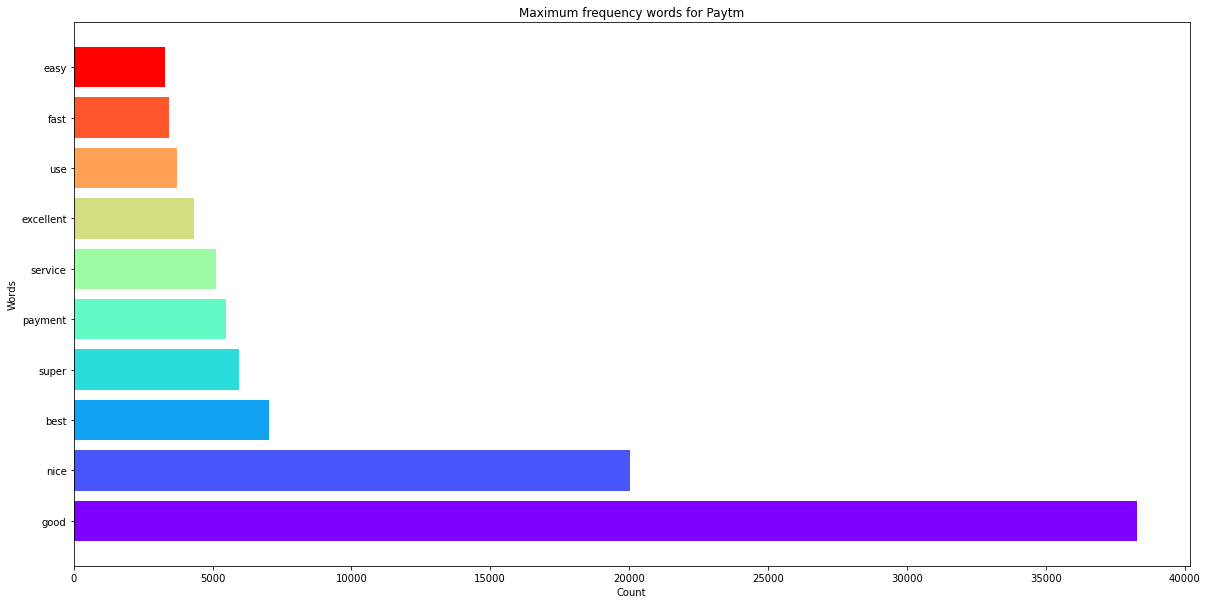

In [764]:
#Display most common 20 words
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Maximum frequency words for Paytm')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

In [765]:
#Importing the libraries
import nltk
nltk.download('punkt')
from nltk import word_tokenize 
from nltk.util import ngrams

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/meghabatra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [766]:
#Bigrams for Google pay
bigrams = filtered_words.apply(lambda row: list(nltk.ngrams(row, 2)))
print(bigrams)

0                                                       []
1                                                       []
2                                                       []
3        [(rasy, use), (use, really), (really, never), ...
4        [(understand, restricting), (restricting, cert...
                               ...                        
34223                                                   []
34224                     [(excellent, easy), (easy, use)]
34225                                        [(easy, use)]
34226                                                   []
34227                                                   []
Name: Content_, Length: 34228, dtype: object


In [767]:
wordcount = []
for i in bigrams:
    for j in i:
        wordcount.append(j)
            
counted_words = collections.Counter(wordcount)
print(counted_words)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



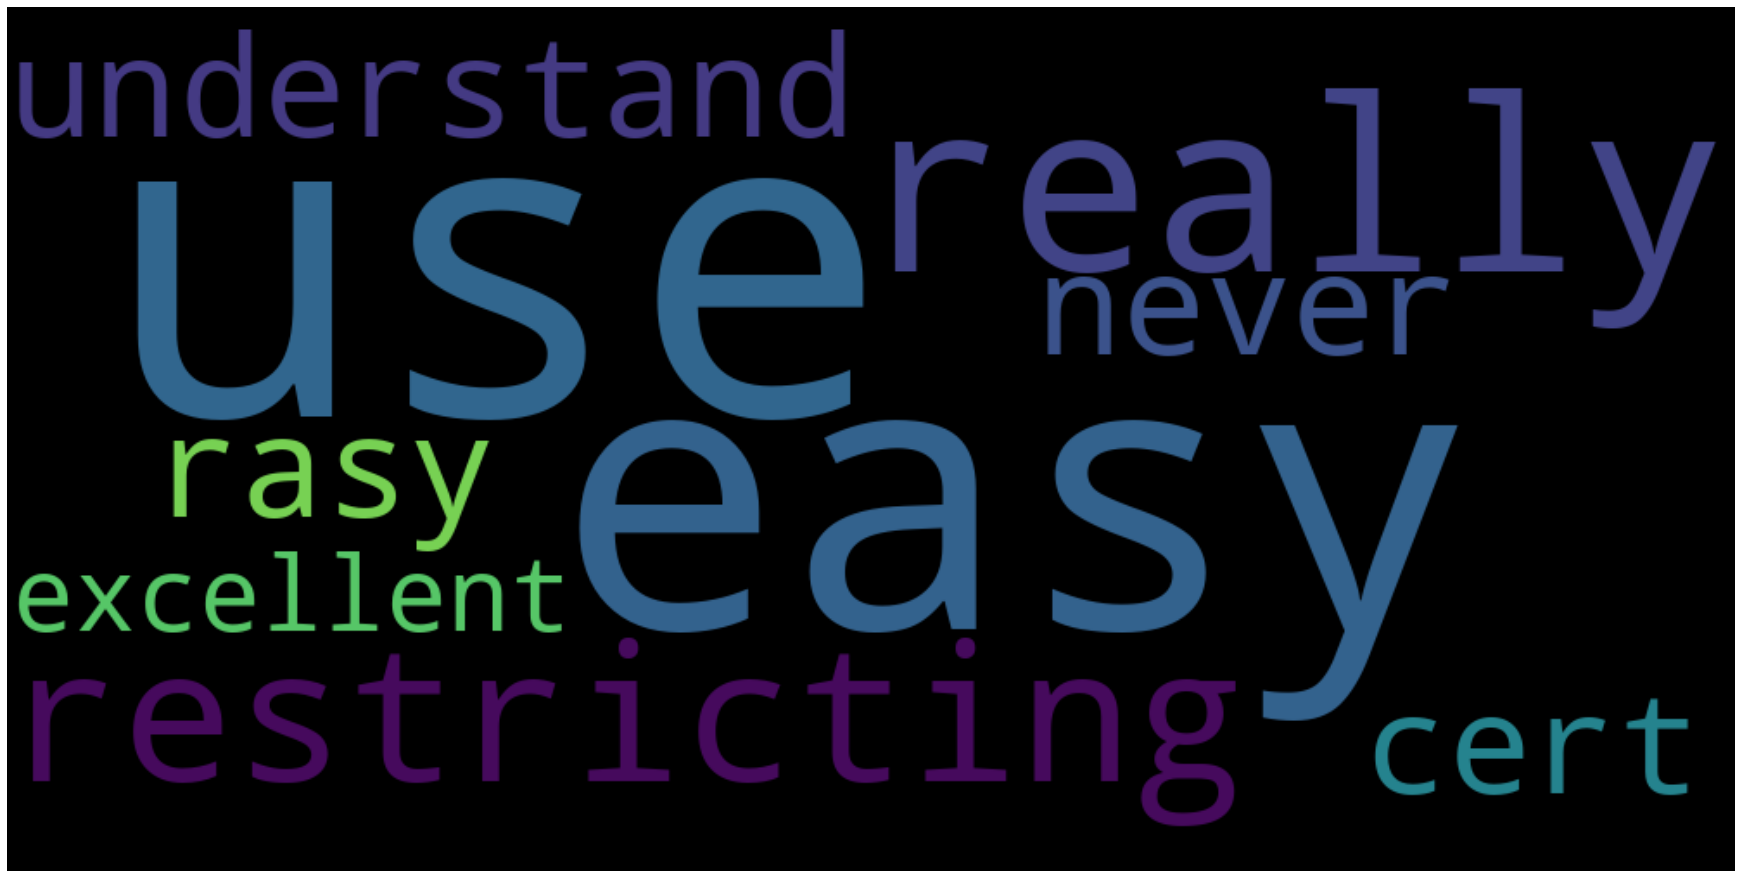

In [768]:
#Word Cloud
wordcloud = WordCloud(width = 1000, height = 500, 
            background_color ='black',
            stopwords = stopwords,
            max_words = 1000,
            min_font_size = 1).generate(str(bigrams))

fig=plt.figure(figsize = (24.0,16.0))
plt.imshow(wordcloud,interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [769]:
#Bigrams for Paytm
bigrams1 = filtered_words1.apply(lambda row: list(nltk.ngrams(row, 2)))
print(bigrams1)

0                                                        []
1                                                        []
2                                          [(wallet, open)]
3                                                        []
4                                                        []
                                ...                        
137902                                                   []
137903    [(unable, use), (use, reddem), (reddem, cashba...
137904                                                   []
137905                                                   []
137906                                                   []
Name: Content_, Length: 137907, dtype: object


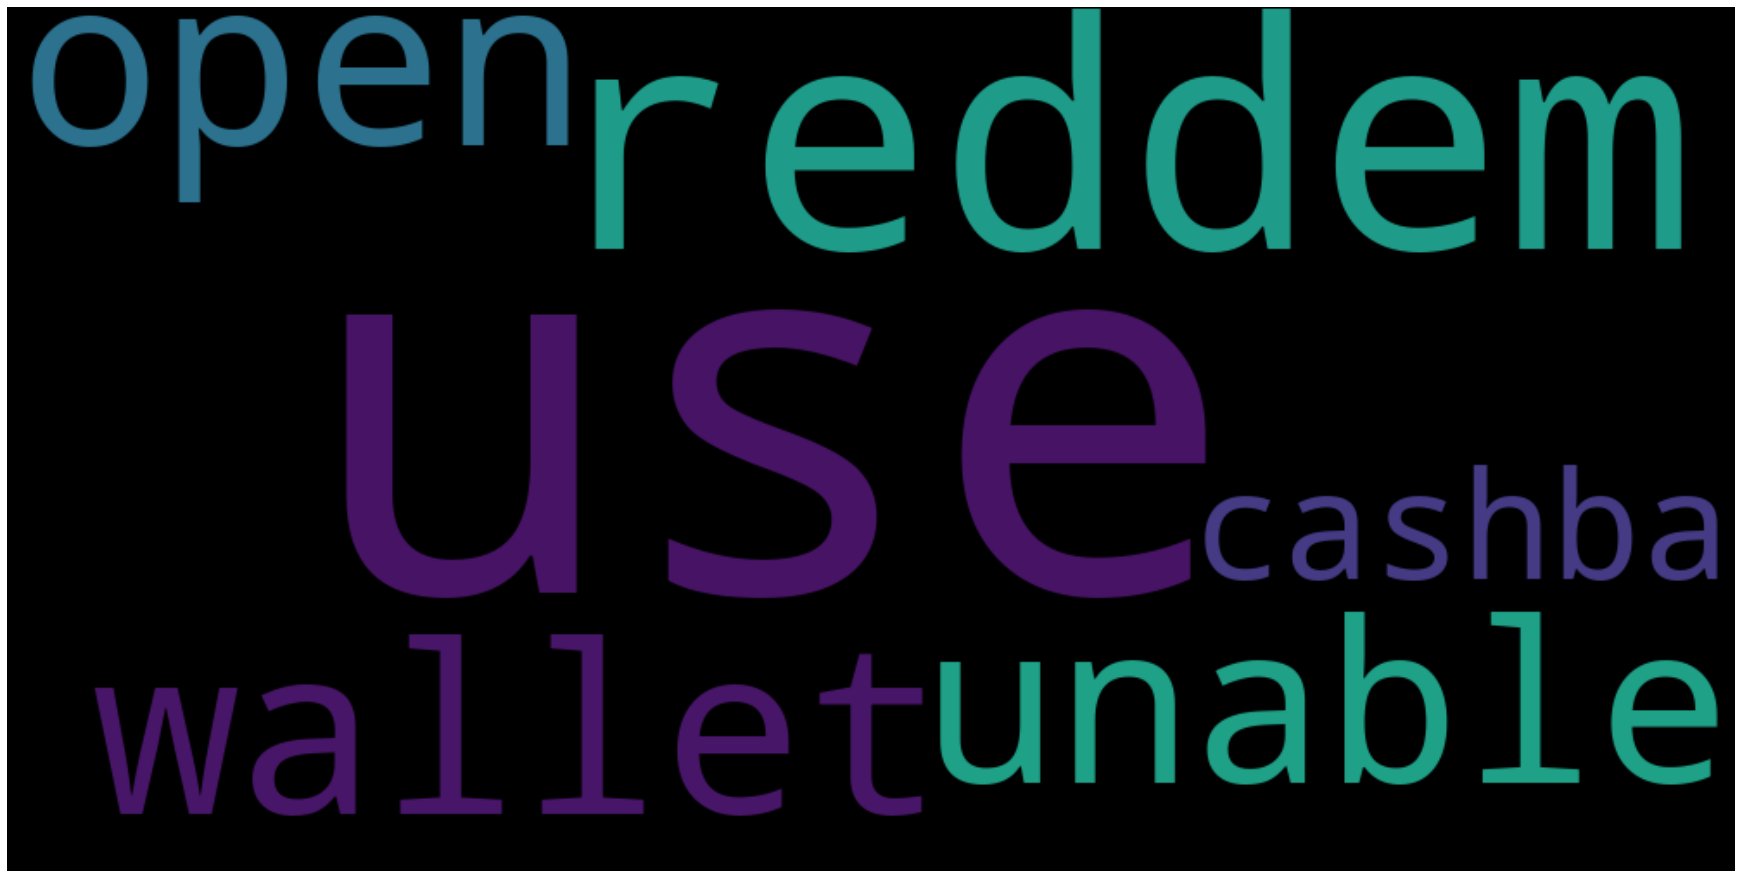

In [770]:
#Word Cloud
wordcloud = WordCloud(width = 1000, height = 500, 
            background_color ='black',
            stopwords = stopwords,
            max_words = 200,
            min_font_size = 10).generate(str(bigrams1))

fig=plt.figure(figsize = (24.0,16.0))
plt.imshow(wordcloud,interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [771]:
#Bigram for Phonepay
bigrams2 = filtered_words2.apply(lambda row: list(nltk.ngrams(row, 2)))
print(bigrams2)

0                             []
1                             []
2                             []
3                             []
4        [(useful, application)]
                  ...           
11736                         []
11737        [(simply, awesome)]
11738                         []
11739                         []
11740                         []
Name: Content_, Length: 11741, dtype: object


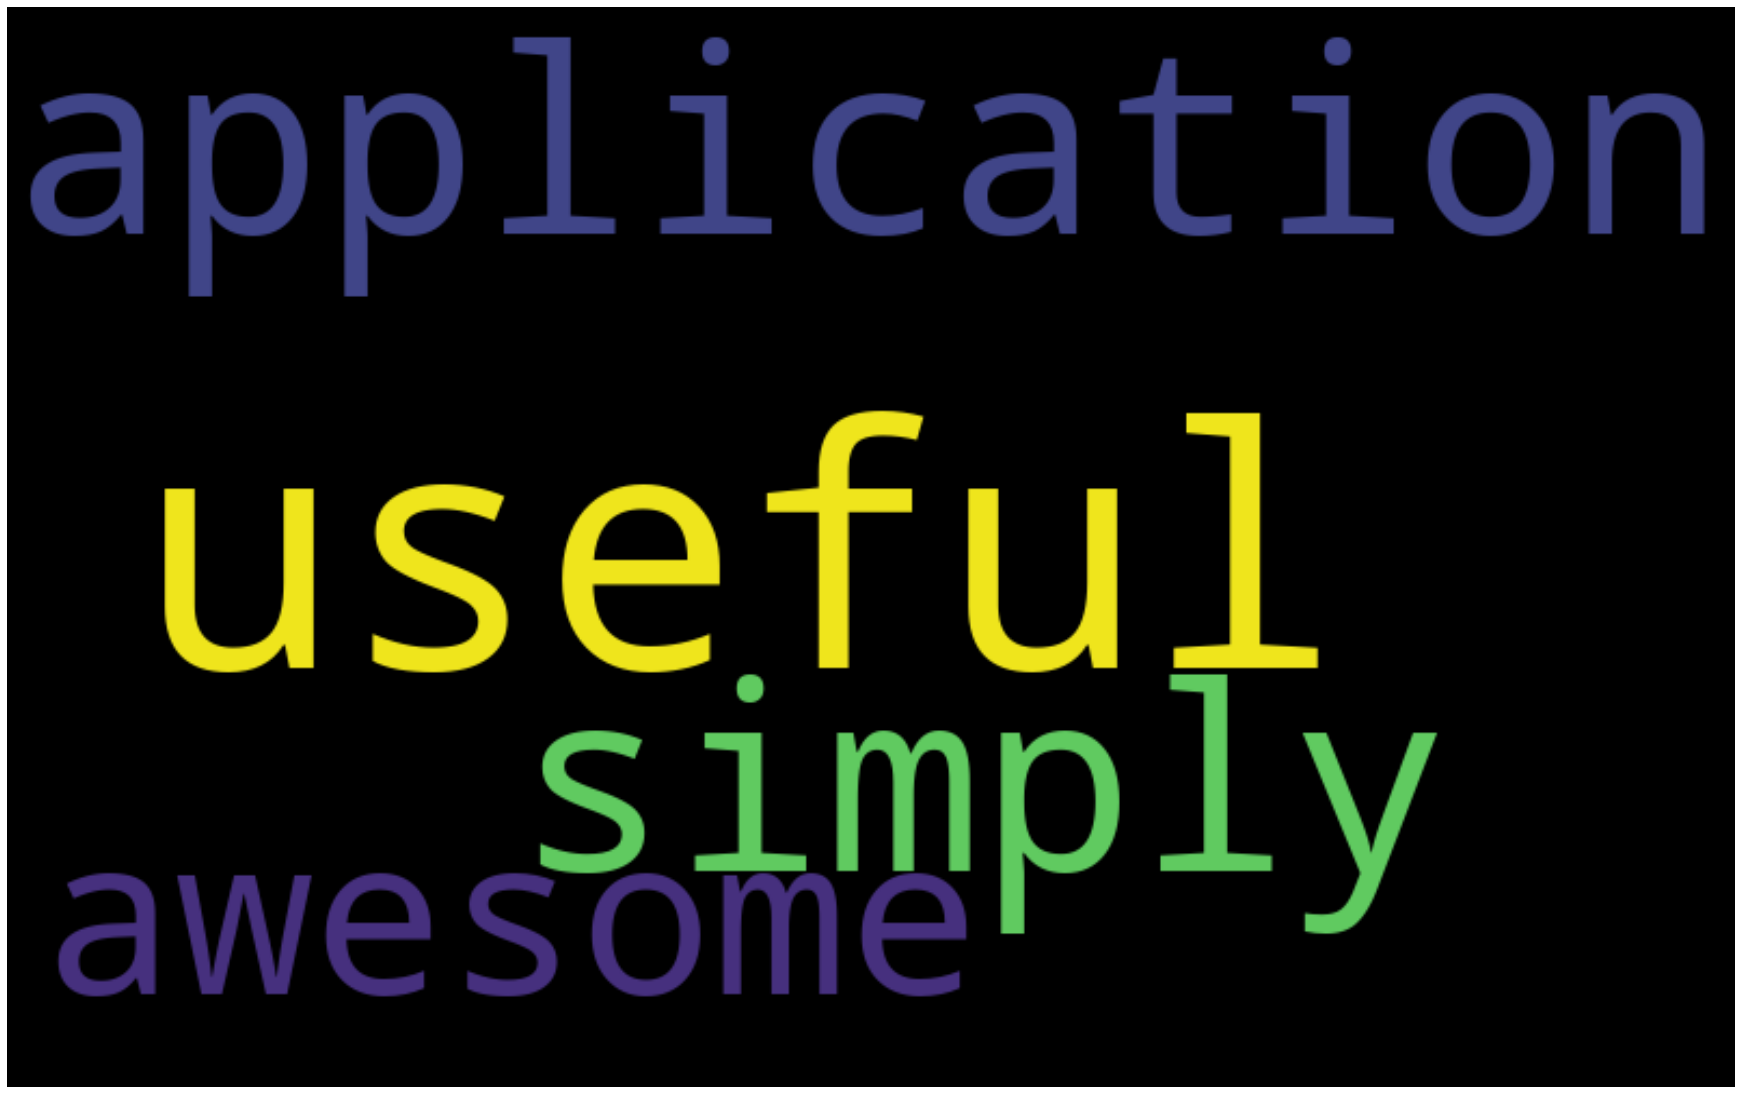

In [772]:
#Word Cloud
wordcloud = WordCloud(width = 800, height = 500, 
            background_color ='black',
            stopwords = stopwords,
            max_words = 200,
            min_font_size = 1).generate(str(bigrams2))

fig=plt.figure(figsize = (24.0,16.0))
plt.imshow(wordcloud,interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

EXPLORATORY DATA ANALYSIS

In [773]:
#Calculating the score for each application
Googlepay = Gpay["score"].value_counts().reset_index()
Googlepay.columns = ["Score", "Count"]
Googlepay

,Score,Count
0,5,19046
1,1,8618
2,4,3043
3,3,1928
4,2,1593


In [774]:
#Display the pie plot
px.pie(Googlepay,
       names='Score',
       values='Count',
      template='plotly_dark',
      title='Score Googlepay')

In [775]:
#Calculating the score for each application
Paytm_india = Paytm["score"].value_counts().reset_index()
Paytm_india.columns = ["Score", "Count"]
Paytm_india

,Score,Count
0,5,99587
1,1,17499
2,4,13640
3,3,4554
4,2,2627


In [776]:
#Display the pie plot
px.pie(Paytm_india,
       names='Score',
       values='Count',
      template='plotly_dark',
      title='Score Paytm')

In [777]:
#Calculating the score for each application
Phonepay_india = Phonepay["score"].value_counts().reset_index()
Phonepay_india.columns = ["Score", "Count"]
Phonepay_india

,Score,Count
0,5,7699
1,1,1765
2,4,1483
3,3,517
4,2,277


In [778]:
#Display the pie plot
px.pie(Phonepay_india,
       names='Score',
       values='Count',
       template='plotly_dark',
       title='Score Paytm')

PhonePay is the most liked Application by the customers.

<AxesSubplot:xlabel='thumbsUpCount'>

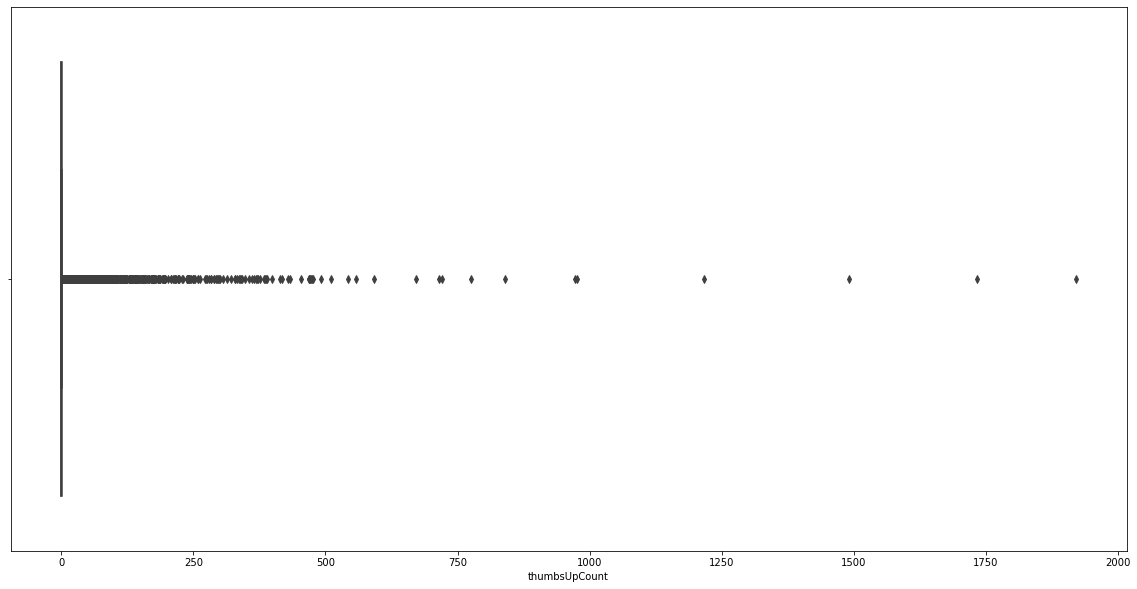

In [779]:
#outliers in thumbsUpCount
sns.boxplot(x=Gpay["thumbsUpCount"])

<AxesSubplot:xlabel='thumbsUpCount'>

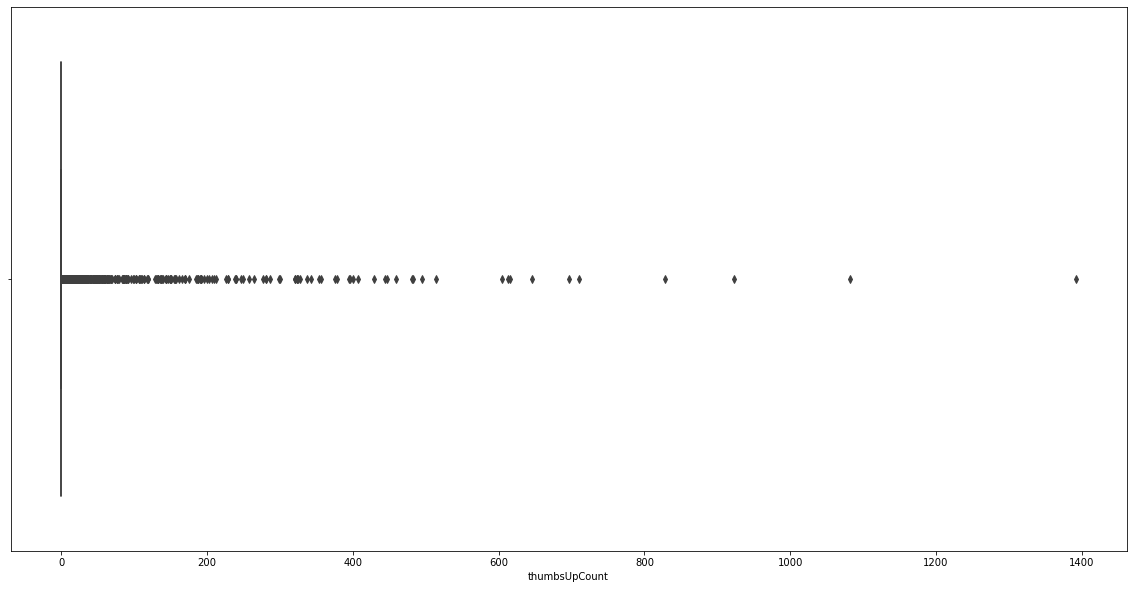

In [780]:
#Checking for the outliers
sns.boxplot(x=Paytm["thumbsUpCount"])

<AxesSubplot:xlabel='thumbsUpCount'>

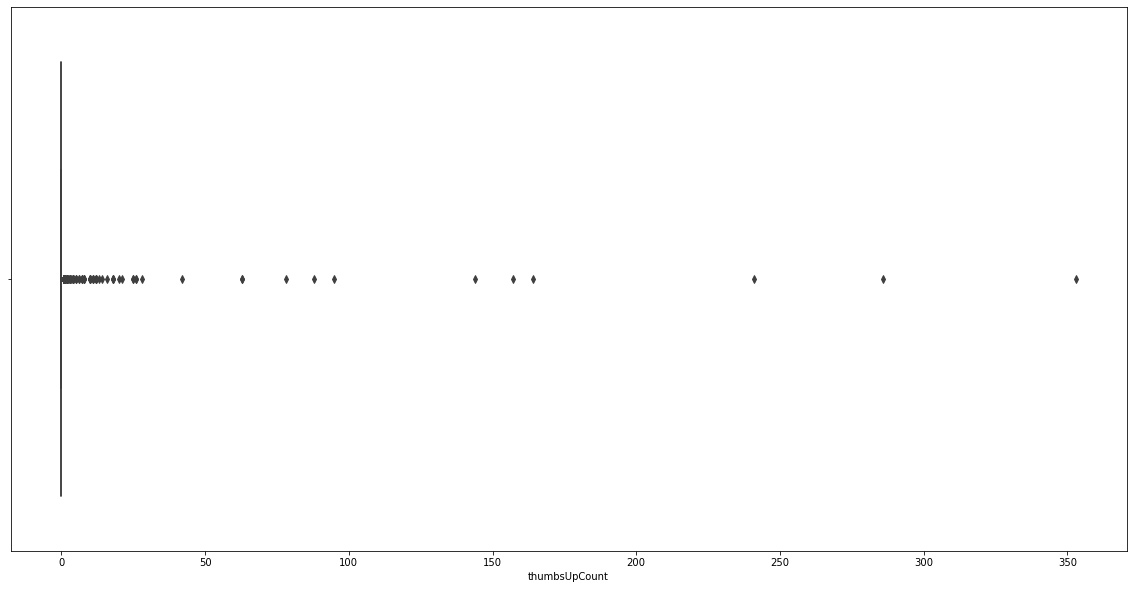

In [781]:
#Checking for the outliers
sns.boxplot(x=Phonepay["thumbsUpCount"])

In [782]:
Gpay = Gpay[Gpay["thumbsUpCount"] <= 500]
Paytm=Paytm[Paytm["thumbsUpCount"]<= 500]
Phonepay = Phonepay[Phonepay["thumbsUpCount"] <= 100]

In [783]:
#making new columns based on existing column
Gpay["replyContent"] = Gpay["replyContent"].fillna("No Reply")
Gpay["repliedAt"] = Gpay["repliedAt"].fillna("No Data")
Gpay

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,Content_nopuncuation,Content_
0,0,gp:AOqpTOEdT_VactGi_J9Q2PEWY7J4XlD7BINhOj9xwOr...,Len Pagnam,https://play-lh.googleusercontent.com/a-/AOh14...,How do add a boarding pass? I see no passes tab.,1,0,2.137.401329300,2021-11-18 17:03:06,Hi Len. Could you try the steps in this guide ...,2021-11-18 17:27:11,How do add a boarding pass I see no passes tab,how do add a boarding pass i see no passes tab
1,1,gp:AOqpTOHltpCzXurPoFUgj-a3L-wApC93-fTvocbF9K7...,Benjamin Silva,https://play-lh.googleusercontent.com/a/AATXAJ...,Best,5,0,2.134.392709498,2021-11-18 16:43:34,No Reply,No Data,Best,best
2,2,gp:AOqpTOGTiyxy_FWSQe7eCONa7PsIP6v7cS-xWCL6jFF...,PARVESH MIAR,https://play-lh.googleusercontent.com/a-/AOh14...,All ok,5,0,2.138.406141160,2021-11-18 16:12:42,No Reply,No Data,All ok,all ok
3,3,gp:AOqpTOHllyGnmLGZqPUGokxYncq9kOKoY3Zz_4ZF6b0...,Mikko L.,https://play-lh.googleusercontent.com/a-/AOh14...,"Rasy to use really... But there never, ever sh...",3,0,2.138.406141160,2021-11-18 16:06:35,No Reply,No Data,Rasy to use really But there never ever should...,rasy to use really but there never ever should...
4,4,gp:AOqpTOHjnJ6gAF4NzruhLDGVszAaTKSerVeKt-UtJfM...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I still do not understand why your restricting...,3,251,2.134.392709498,2021-11-18 15:48:08,No Reply,No Data,I still do not understand why your restricting...,i still do not understand why your restricting...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34223,34223,gp:AOqpTOEXYnopFG3RZ8fVrBC9yqXnVjmhnDI0Ji99tXb...,Daran Smith,https://play-lh.googleusercontent.com/a-/AOh14...,Like it good app,5,0,2.96.264233179,2019-10-01 02:47:10,No Reply,No Data,Like it good app,like it good app
34224,34224,gp:AOqpTOEVXSkb09ThJsY2TZ0awLgMSCO0qzySxtcT7x9...,Judi Anne,https://play-lh.googleusercontent.com/a-/AOh14...,Excellent very easy to use,5,0,2.95.262992467,2019-10-01 02:38:48,No Reply,No Data,Excellent very easy to use,excellent very easy to use
34225,34225,gp:AOqpTOHv3DyIxgg2a61I_QQGgjbFodIUp6UlaUpd4M9...,Noori Lal,https://play-lh.googleusercontent.com/a-/AOh14...,Easy to use.,5,0,2.96.264233179,2019-10-01 02:17:54,No Reply,No Data,Easy to use,easy to use
34226,34226,gp:AOqpTOHEnAmESklDXdnvO13QBDl9gOlH4M1qQs-gMYS...,Josh Phillips,https://play-lh.googleusercontent.com/a-/AOh14...,Works how it should,5,0,2.96.264233179,2019-10-01 02:09:34,No Reply,No Data,Works how it should,works how it should


In [784]:
#making new columns based on existing column
Paytm["replyContent"] = Paytm["replyContent"].fillna("No Reply")
Paytm["repliedAt"] = Paytm["repliedAt"].fillna("No Data")
Paytm

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,Content_nopuncuation,Content_
0,0,gp:AOqpTOEc6EnY3FO6tSm3wM-BBLk-WIELfZcXamX2umO...,HARSH KASHYAP,https://play-lh.googleusercontent.com/a-/AOh14...,Op,5,0,NaN,2021-11-18 18:42:29,No Reply,No Data,Op,op
1,1,gp:AOqpTOFD057GRoLc_eZm_mijn7p_wL9DtQoxrYnL_Gg...,manikeswar shabar,https://play-lh.googleusercontent.com/a-/AOh14...,Good,5,0,9.17.3,2021-11-18 18:41:39,No Reply,No Data,Good,good
2,2,gp:AOqpTOGse_Ua7yhZRYP0bvEWZ4DqJlOAJWLQC1376sQ...,Rajendra Kumar,https://play-lh.googleusercontent.com/a/AATXAJ...,My paytm wallet app is open,4,0,9.17.3,2021-11-18 18:41:35,Hi Rajendra! We’d like to take a closer look a...,2021-11-18 16:14:32,My paytm wallet app is open,my paytm wallet app is open
3,3,gp:AOqpTOGRVqBtB88sM6cyPudXWCG1SH_6jccdyaRNkO-...,Kagga Balaji,https://play-lh.googleusercontent.com/a/AATXAJ...,Super,5,0,9.17.3,2021-11-18 18:41:33,No Reply,No Data,Super,super
4,4,gp:AOqpTOHFQGJvGKSgSfzzd7jtRS68lYQNfk5rs0-u2gZ...,Ajay Pandey,https://play-lh.googleusercontent.com/a/AATXAJ...,The best,5,0,9.17.3,2021-11-18 18:41:11,No Reply,No Data,The best,the best
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137902,137902,gp:AOqpTOFIQj0SmJ8Q3QjaOxpJITSUKxy9JL6X2SYg6xi...,Gajendra Kilbile,https://play-lh.googleusercontent.com/a-/AOh14...,Good,5,0,9.10.2,2021-07-29 21:29:25,Awesome! It's been our pleasure. You can also ...,2021-07-29 21:32:26,Good,good
137903,137903,gp:AOqpTOFO7qp8ODVP09qJrVJepXjDSKAvAhPO4dJ8k_i...,Pratixa Dhak,https://play-lh.googleusercontent.com/a-/AOh14...,Unable to use or reddem cashback points..too b...,1,0,NaN,2021-07-29 21:28:53,Hi! We’d like to take a closer look and help y...,2021-07-29 21:37:00,Unable to use or reddem cashback pointstoo bad...,unable to use or reddem cashback pointstoo bad...
137904,137904,gp:AOqpTOEH0iQNvCoJE9WLJxRT_Ossb2KiD7ifty1HD6b...,Srinu Sri,https://play-lh.googleusercontent.com/a-/AOh14...,super,5,0,NaN,2021-07-29 21:27:39,No Reply,No Data,super,super
137905,137905,gp:AOqpTOEQ43KX5bmnQ8f2gQe_-Qur3CoOumhMqrHvdNK...,Sagar Kumar,https://play-lh.googleusercontent.com/a/AATXAJ...,Nice,5,0,9.10.2,2021-07-29 21:27:20,No Reply,No Data,Nice,nice


In [785]:
#making new columns based on existing column
Phonepay["replyContent"] = Phonepay["replyContent"].fillna("No Reply")
Phonepay["repliedAt"] = Phonepay["repliedAt"].fillna("No Data")
Phonepay

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,Content_nopuncuation,Content_
0,0,gp:AOqpTOGzdJxN4w4Xt7Uj3Xv1643TSxHxgEupPopMLfe...,Akki Love,https://play-lh.googleusercontent.com/a/AATXAJ...,Nice app,5,0,4.0.18,2021-11-18 18:37:42,No Reply,No Data,Nice app,nice app
1,1,gp:AOqpTOGg0B7fjwyBlTD-1Sa-UxAWV7_AXNDQyLzb4cH...,datta samindar,https://play-lh.googleusercontent.com/a-/AOh14...,Sup,5,0,NaN,2021-11-18 18:37:35,No Reply,No Data,Sup,sup
2,2,gp:AOqpTOFhQbsuL9mVajhqY8hukiQzOeqx8P7FeSK2nsM...,Rahul Jadhav,https://play-lh.googleusercontent.com/a-/AOh14...,,1,0,4.1.23,2021-11-18 18:36:58,No Reply,No Data,,
3,3,gp:AOqpTOHA1KGb6C90eCxXxpIWWTMsV4ia7OlXzEuGOwA...,Rao Farman Ali,https://play-lh.googleusercontent.com/a-/AOh14...,,1,0,4.1.25,2021-11-18 18:36:22,No Reply,No Data,,
4,4,gp:AOqpTOE9ZJT-nlC9-JeDjgnTSORq_tD-_gkrIiRRUfE...,Tapaswini Rana,https://play-lh.googleusercontent.com/a/AATXAJ...,Useful application,5,0,4.1.25,2021-11-18 18:35:39,No Reply,No Data,Useful application,useful application
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11736,11736,gp:AOqpTOEI3U9pLM_RUp8LcwRgbDyaImBZQlgPh1lhVUA...,Ashok Pawar,https://play-lh.googleusercontent.com/a-/AOh14...,good,5,0,4.1.25,2021-11-10 15:27:29,No Reply,No Data,good,good
11737,11737,gp:AOqpTOFuSV_9Lt31JbHaR000CauJbntWPTdISIwneYE...,Tabish Khan,https://play-lh.googleusercontent.com/a-/AOh14...,Simply awesome,5,0,4.1.25,2021-11-10 15:27:27,No Reply,No Data,Simply awesome,simply awesome
11738,11738,gp:AOqpTOEdjlMnAP0bMX4oKZ2eOEUtZvfJjzGjsljWCKK...,Kiran Shinde Patil,https://play-lh.googleusercontent.com/a-/AOh14...,Super,1,0,4.1.25,2021-11-10 15:26:55,"Thank you for the feedback, Kiran. We work har...",2021-11-10 15:40:13,Super,super
11739,11739,gp:AOqpTOH6bRKH7nM-B6306EUk-mSMrKejmGMyDm2u-iK...,The Indian,https://play-lh.googleusercontent.com/a-/AOh14...,Excellent,5,0,4.1.18,2021-11-10 15:23:32,No Reply,No Data,Excellent,excellent


In [786]:
Gpay["reply_given"] = Gpay["replyContent"].apply(lambda x : "Reply Given" if x!= "No Reply" else "No Reply")
Gpay

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,Content_nopuncuation,Content_,reply_given
0,0,gp:AOqpTOEdT_VactGi_J9Q2PEWY7J4XlD7BINhOj9xwOr...,Len Pagnam,https://play-lh.googleusercontent.com/a-/AOh14...,How do add a boarding pass? I see no passes tab.,1,0,2.137.401329300,2021-11-18 17:03:06,Hi Len. Could you try the steps in this guide ...,2021-11-18 17:27:11,How do add a boarding pass I see no passes tab,how do add a boarding pass i see no passes tab,Reply Given
1,1,gp:AOqpTOHltpCzXurPoFUgj-a3L-wApC93-fTvocbF9K7...,Benjamin Silva,https://play-lh.googleusercontent.com/a/AATXAJ...,Best,5,0,2.134.392709498,2021-11-18 16:43:34,No Reply,No Data,Best,best,No Reply
2,2,gp:AOqpTOGTiyxy_FWSQe7eCONa7PsIP6v7cS-xWCL6jFF...,PARVESH MIAR,https://play-lh.googleusercontent.com/a-/AOh14...,All ok,5,0,2.138.406141160,2021-11-18 16:12:42,No Reply,No Data,All ok,all ok,No Reply
3,3,gp:AOqpTOHllyGnmLGZqPUGokxYncq9kOKoY3Zz_4ZF6b0...,Mikko L.,https://play-lh.googleusercontent.com/a-/AOh14...,"Rasy to use really... But there never, ever sh...",3,0,2.138.406141160,2021-11-18 16:06:35,No Reply,No Data,Rasy to use really But there never ever should...,rasy to use really but there never ever should...,No Reply
4,4,gp:AOqpTOHjnJ6gAF4NzruhLDGVszAaTKSerVeKt-UtJfM...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I still do not understand why your restricting...,3,251,2.134.392709498,2021-11-18 15:48:08,No Reply,No Data,I still do not understand why your restricting...,i still do not understand why your restricting...,No Reply
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34223,34223,gp:AOqpTOEXYnopFG3RZ8fVrBC9yqXnVjmhnDI0Ji99tXb...,Daran Smith,https://play-lh.googleusercontent.com/a-/AOh14...,Like it good app,5,0,2.96.264233179,2019-10-01 02:47:10,No Reply,No Data,Like it good app,like it good app,No Reply
34224,34224,gp:AOqpTOEVXSkb09ThJsY2TZ0awLgMSCO0qzySxtcT7x9...,Judi Anne,https://play-lh.googleusercontent.com/a-/AOh14...,Excellent very easy to use,5,0,2.95.262992467,2019-10-01 02:38:48,No Reply,No Data,Excellent very easy to use,excellent very easy to use,No Reply
34225,34225,gp:AOqpTOHv3DyIxgg2a61I_QQGgjbFodIUp6UlaUpd4M9...,Noori Lal,https://play-lh.googleusercontent.com/a-/AOh14...,Easy to use.,5,0,2.96.264233179,2019-10-01 02:17:54,No Reply,No Data,Easy to use,easy to use,No Reply
34226,34226,gp:AOqpTOHEnAmESklDXdnvO13QBDl9gOlH4M1qQs-gMYS...,Josh Phillips,https://play-lh.googleusercontent.com/a-/AOh14...,Works how it should,5,0,2.96.264233179,2019-10-01 02:09:34,No Reply,No Data,Works how it should,works how it should,No Reply


In [787]:
G = Gpay["reply_given"].value_counts().reset_index()
G.columns = ["Reply_type", "Reply_given"]
G

,Reply_type,Reply_given
0,No Reply,28106
1,Reply Given,6107


[Text(0.5, 1.0, 'Bar plot to show the number of replies given by the management')]

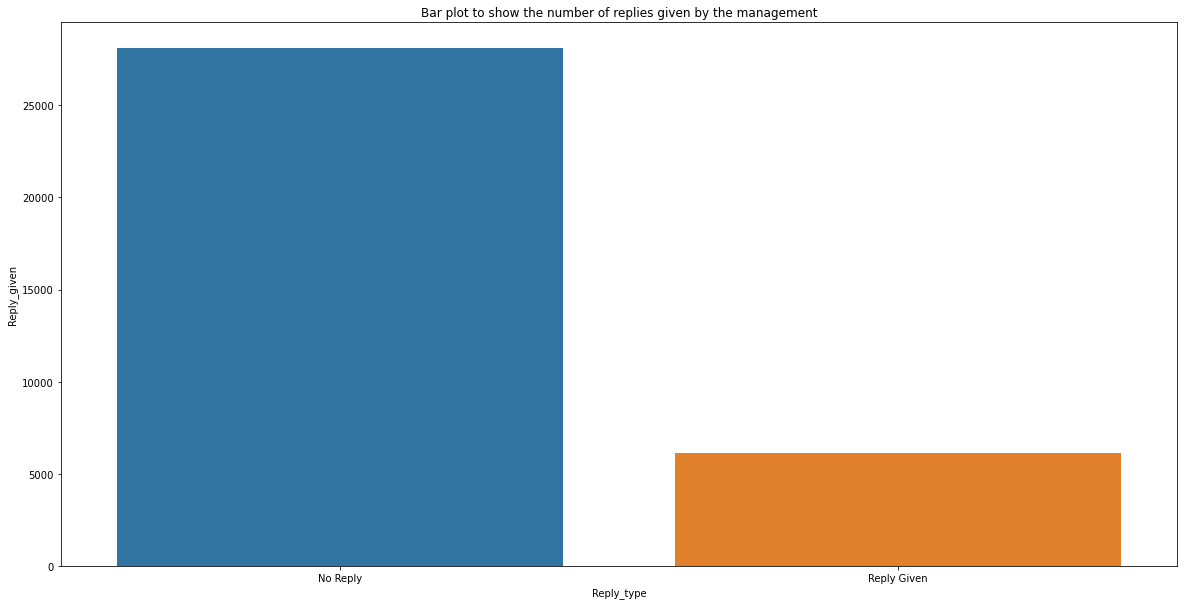

In [788]:
#Plot replay_type vs Reply_given 
sns.barplot(x= "Reply_type", y="Reply_given",
        data=G).set(title='Bar plot to show the number of replies given by the management')

In [789]:
Paytm["reply_given"] = Paytm["replyContent"].apply(lambda x : "Reply Given" if x!= "No Reply" else "No Reply")
Paytm

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,Content_nopuncuation,Content_,reply_given
0,0,gp:AOqpTOEc6EnY3FO6tSm3wM-BBLk-WIELfZcXamX2umO...,HARSH KASHYAP,https://play-lh.googleusercontent.com/a-/AOh14...,Op,5,0,NaN,2021-11-18 18:42:29,No Reply,No Data,Op,op,No Reply
1,1,gp:AOqpTOFD057GRoLc_eZm_mijn7p_wL9DtQoxrYnL_Gg...,manikeswar shabar,https://play-lh.googleusercontent.com/a-/AOh14...,Good,5,0,9.17.3,2021-11-18 18:41:39,No Reply,No Data,Good,good,No Reply
2,2,gp:AOqpTOGse_Ua7yhZRYP0bvEWZ4DqJlOAJWLQC1376sQ...,Rajendra Kumar,https://play-lh.googleusercontent.com/a/AATXAJ...,My paytm wallet app is open,4,0,9.17.3,2021-11-18 18:41:35,Hi Rajendra! We’d like to take a closer look a...,2021-11-18 16:14:32,My paytm wallet app is open,my paytm wallet app is open,Reply Given
3,3,gp:AOqpTOGRVqBtB88sM6cyPudXWCG1SH_6jccdyaRNkO-...,Kagga Balaji,https://play-lh.googleusercontent.com/a/AATXAJ...,Super,5,0,9.17.3,2021-11-18 18:41:33,No Reply,No Data,Super,super,No Reply
4,4,gp:AOqpTOHFQGJvGKSgSfzzd7jtRS68lYQNfk5rs0-u2gZ...,Ajay Pandey,https://play-lh.googleusercontent.com/a/AATXAJ...,The best,5,0,9.17.3,2021-11-18 18:41:11,No Reply,No Data,The best,the best,No Reply
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137902,137902,gp:AOqpTOFIQj0SmJ8Q3QjaOxpJITSUKxy9JL6X2SYg6xi...,Gajendra Kilbile,https://play-lh.googleusercontent.com/a-/AOh14...,Good,5,0,9.10.2,2021-07-29 21:29:25,Awesome! It's been our pleasure. You can also ...,2021-07-29 21:32:26,Good,good,Reply Given
137903,137903,gp:AOqpTOFO7qp8ODVP09qJrVJepXjDSKAvAhPO4dJ8k_i...,Pratixa Dhak,https://play-lh.googleusercontent.com/a-/AOh14...,Unable to use or reddem cashback points..too b...,1,0,NaN,2021-07-29 21:28:53,Hi! We’d like to take a closer look and help y...,2021-07-29 21:37:00,Unable to use or reddem cashback pointstoo bad...,unable to use or reddem cashback pointstoo bad...,Reply Given
137904,137904,gp:AOqpTOEH0iQNvCoJE9WLJxRT_Ossb2KiD7ifty1HD6b...,Srinu Sri,https://play-lh.googleusercontent.com/a-/AOh14...,super,5,0,NaN,2021-07-29 21:27:39,No Reply,No Data,super,super,No Reply
137905,137905,gp:AOqpTOEQ43KX5bmnQ8f2gQe_-Qur3CoOumhMqrHvdNK...,Sagar Kumar,https://play-lh.googleusercontent.com/a/AATXAJ...,Nice,5,0,9.10.2,2021-07-29 21:27:20,No Reply,No Data,Nice,nice,No Reply


In [790]:
Pay = Paytm["reply_given"].value_counts().reset_index()
Pay.columns = ["Reply_type", "Reply_given"]
Pay

,Reply_type,Reply_given
0,No Reply,69776
1,Reply Given,68120


[Text(0.5, 1.0, 'Bar plot to show the number of replies given by the management')]

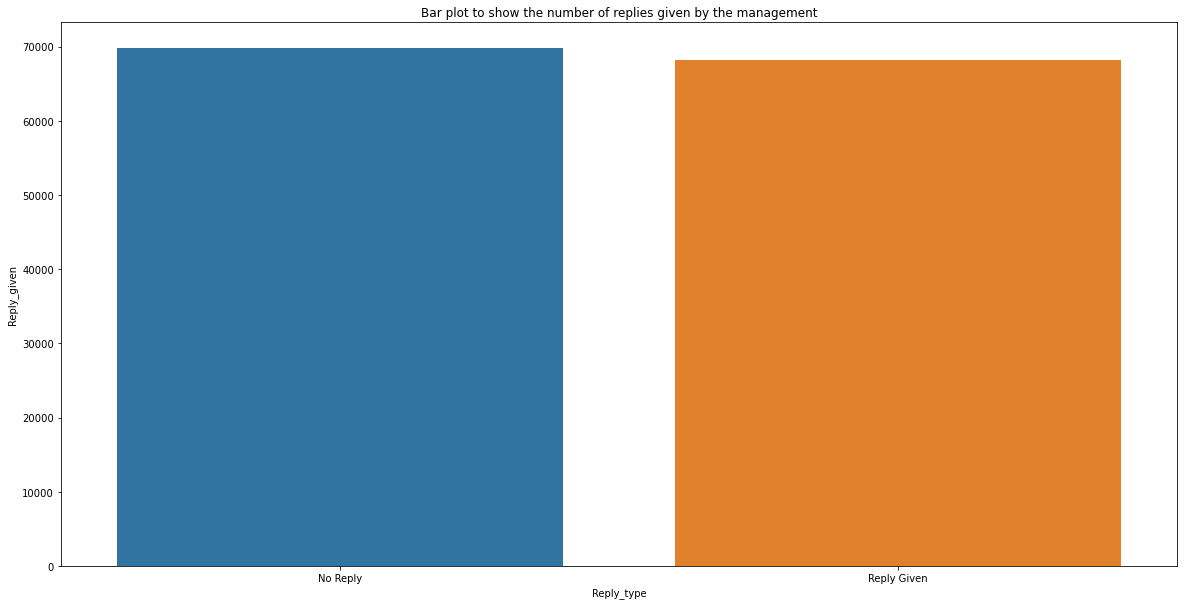

In [791]:
#Plot replay_type vs Reply_given
sns.barplot(x= "Reply_type", y="Reply_given",
        data=Pay).set(title='Bar plot to show the number of replies given by the management')

In [792]:
Phonepay["reply_given"] = Phonepay["replyContent"].apply(lambda x : "Reply Given" if x!= "No Reply" else "No Reply")
Phonepay

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,Content_nopuncuation,Content_,reply_given
0,0,gp:AOqpTOGzdJxN4w4Xt7Uj3Xv1643TSxHxgEupPopMLfe...,Akki Love,https://play-lh.googleusercontent.com/a/AATXAJ...,Nice app,5,0,4.0.18,2021-11-18 18:37:42,No Reply,No Data,Nice app,nice app,No Reply
1,1,gp:AOqpTOGg0B7fjwyBlTD-1Sa-UxAWV7_AXNDQyLzb4cH...,datta samindar,https://play-lh.googleusercontent.com/a-/AOh14...,Sup,5,0,NaN,2021-11-18 18:37:35,No Reply,No Data,Sup,sup,No Reply
2,2,gp:AOqpTOFhQbsuL9mVajhqY8hukiQzOeqx8P7FeSK2nsM...,Rahul Jadhav,https://play-lh.googleusercontent.com/a-/AOh14...,,1,0,4.1.23,2021-11-18 18:36:58,No Reply,No Data,,,No Reply
3,3,gp:AOqpTOHA1KGb6C90eCxXxpIWWTMsV4ia7OlXzEuGOwA...,Rao Farman Ali,https://play-lh.googleusercontent.com/a-/AOh14...,,1,0,4.1.25,2021-11-18 18:36:22,No Reply,No Data,,,No Reply
4,4,gp:AOqpTOE9ZJT-nlC9-JeDjgnTSORq_tD-_gkrIiRRUfE...,Tapaswini Rana,https://play-lh.googleusercontent.com/a/AATXAJ...,Useful application,5,0,4.1.25,2021-11-18 18:35:39,No Reply,No Data,Useful application,useful application,No Reply
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11736,11736,gp:AOqpTOEI3U9pLM_RUp8LcwRgbDyaImBZQlgPh1lhVUA...,Ashok Pawar,https://play-lh.googleusercontent.com/a-/AOh14...,good,5,0,4.1.25,2021-11-10 15:27:29,No Reply,No Data,good,good,No Reply
11737,11737,gp:AOqpTOFuSV_9Lt31JbHaR000CauJbntWPTdISIwneYE...,Tabish Khan,https://play-lh.googleusercontent.com/a-/AOh14...,Simply awesome,5,0,4.1.25,2021-11-10 15:27:27,No Reply,No Data,Simply awesome,simply awesome,No Reply
11738,11738,gp:AOqpTOEdjlMnAP0bMX4oKZ2eOEUtZvfJjzGjsljWCKK...,Kiran Shinde Patil,https://play-lh.googleusercontent.com/a-/AOh14...,Super,1,0,4.1.25,2021-11-10 15:26:55,"Thank you for the feedback, Kiran. We work har...",2021-11-10 15:40:13,Super,super,Reply Given
11739,11739,gp:AOqpTOH6bRKH7nM-B6306EUk-mSMrKejmGMyDm2u-iK...,The Indian,https://play-lh.googleusercontent.com/a-/AOh14...,Excellent,5,0,4.1.18,2021-11-10 15:23:32,No Reply,No Data,Excellent,excellent,No Reply


In [793]:
Phone = Phonepay["reply_given"].value_counts().reset_index()
Phone

,index,reply_given
0,No Reply,8803
1,Reply Given,2932


[Text(0.5, 1.0, 'Bar plot to show the number of replies given by the management')]

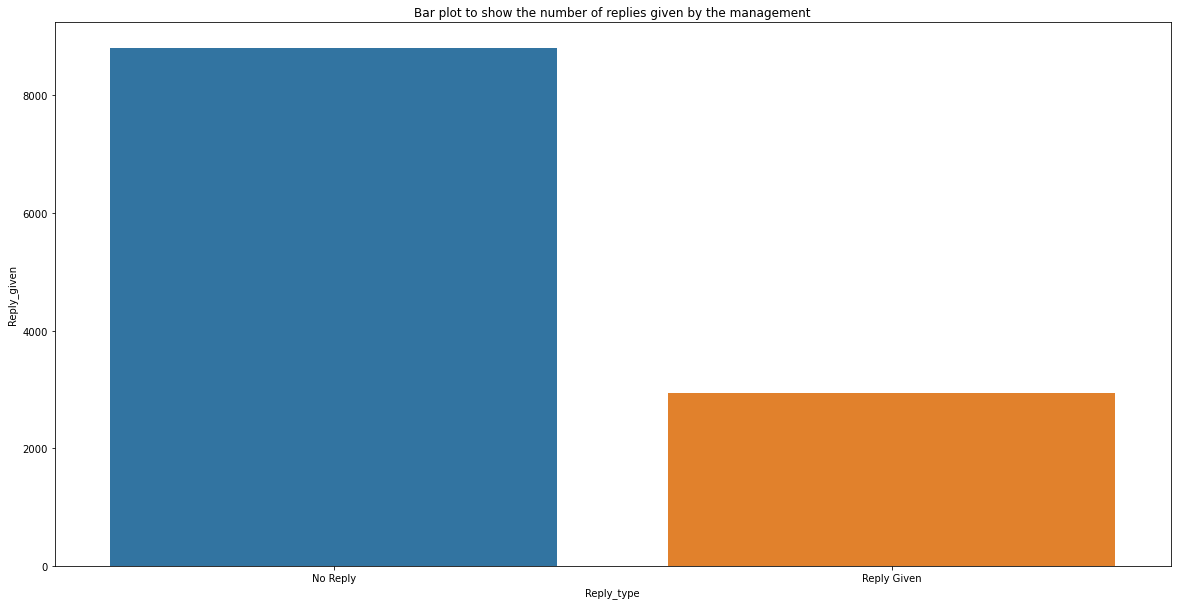

In [794]:
#Plot replay_type vs Reply_given 
Phone.columns = ["Reply_type", "Reply_given"]
sns.barplot(x= "Reply_type", y="Reply_given",
        data=Phone).set(title='Bar plot to show the number of replies given by the management')

[Text(0.5, 1.0, 'Score V/s Reply given by the management')]

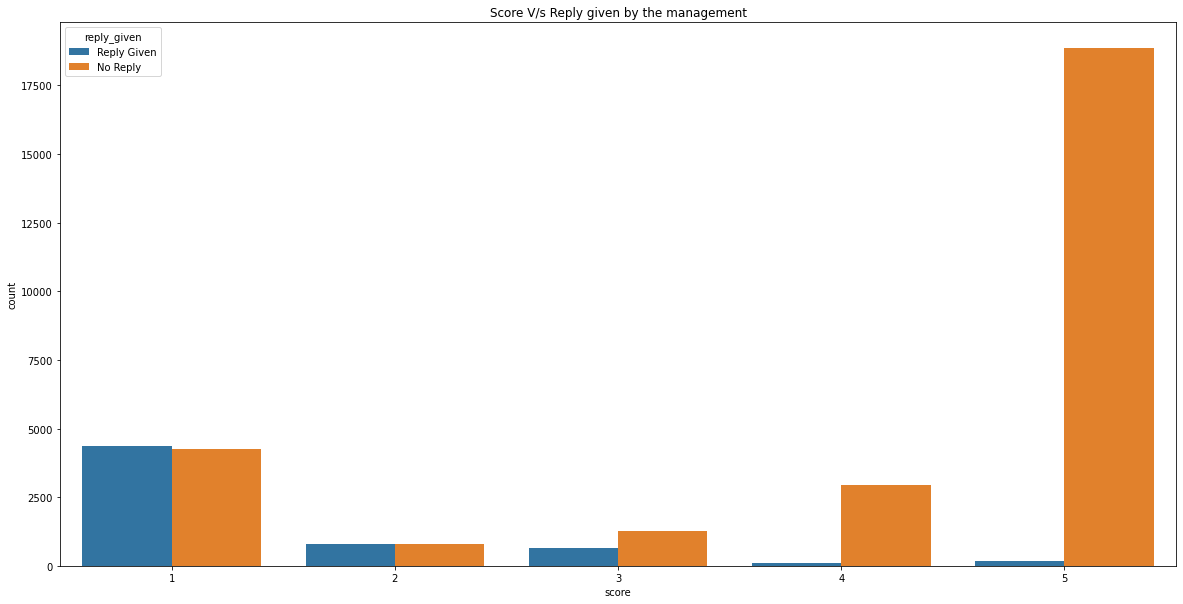

In [795]:

sns.countplot(x="score", hue="reply_given", data=Gpay).set(title='Score V/s Reply given by the management')

[Text(0.5, 1.0, 'Score V/s Reply given by the management')]

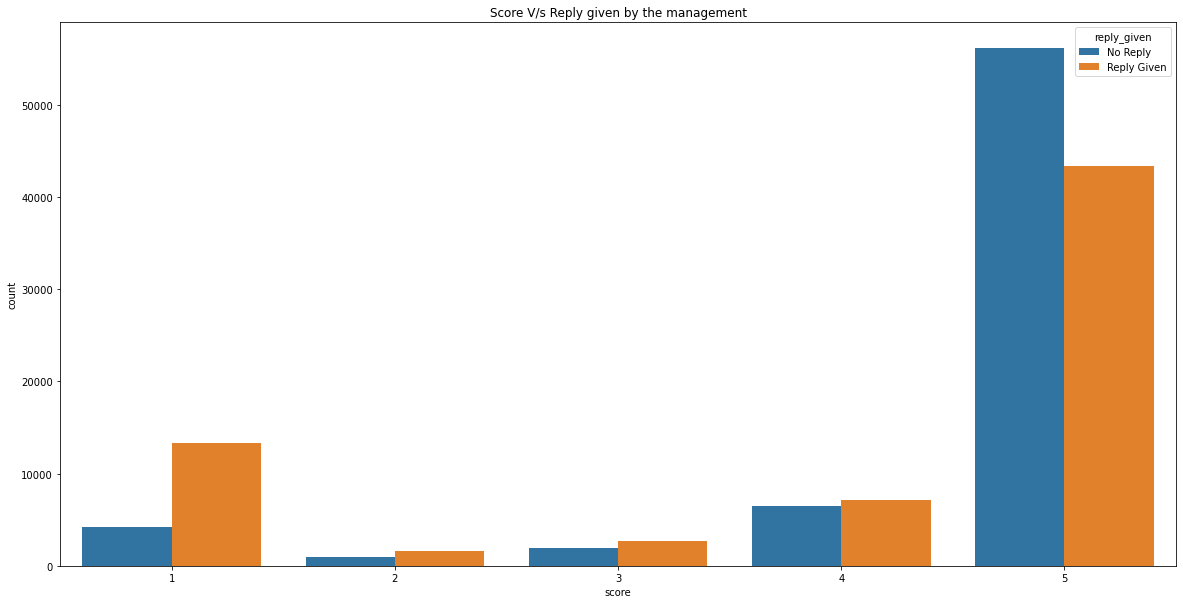

In [796]:
sns.countplot(x="score", hue="reply_given", data=Paytm).set(title='Score V/s Reply given by the management')

[Text(0.5, 1.0, 'Score V/s Reply given by the management')]

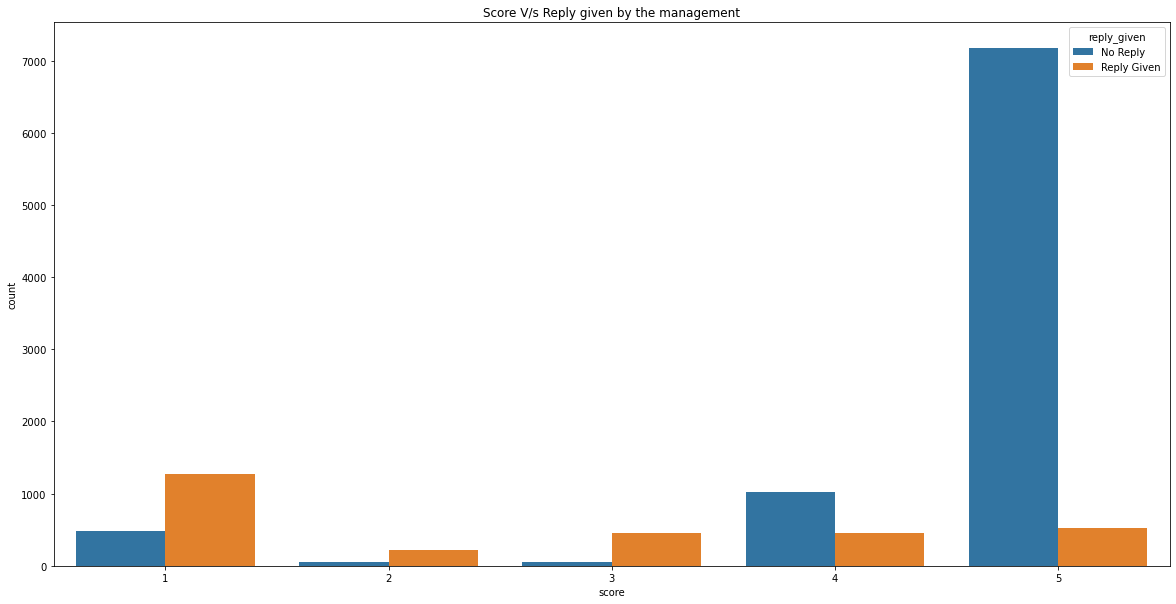

In [797]:
sns.countplot(x="score", hue="reply_given", data=Phonepay).set(title='Score V/s Reply given by the management')